___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction:*** It is employee satisfaction point, which ranges from 0-1.
- ***evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***projects:*** How many of projects assigned to an employee?
- ***hours:*** How many hours in averega an employee worked in a month?
- **lengthofservice:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***accident:*** Whether an employee has had a work accident or not.
- ***promotion:*** Whether an employee has had a promotion in the last 5 years or not.
- ***department:*** Employee's working department/division.
- ***salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df=pd.read_csv('HR_Dataset.csv')
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [3]:
df.rename(columns={'satisfaction_level':'satisfaction', 'last_evaluation':'evaluation',
                  'number_project':'projects', 'average_montly_hours':'hours', 
                  'time_spend_company':'lengthofservice', 'Work_accident':'accident',
                  'promotion_last_5years':'promotion', 'Departments ':'department'}, inplace=True)

df = df[[col for col in df if col != 'left'] + ['left']]
df.head()

satisfaction  evaluation  projects  hours  lengthofservice  accident  \
0          0.38        0.53         2    157                3         0   
1          0.80        0.86         5    262                6         0   
2          0.11        0.88         7    272                4         0   
3          0.72        0.87         5    223                5         0   
4          0.37        0.52         2    159                3         0   

   promotion department  salary  left  
0          0      sales     low     1  
1          0      sales  medium     1  
2          0      sales  medium     1  
3          0      sales     low     1  
4          0      sales     low     1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   satisfaction     14999 non-null  float64
 1   evaluation       14999 non-null  float64
 2   projects         14999 non-null  int64  
 3   hours            14999 non-null  int64  
 4   lengthofservice  14999 non-null  int64  
 5   accident         14999 non-null  int64  
 6   promotion        14999 non-null  int64  
 7   department       14999 non-null  object 
 8   salary           14999 non-null  object 
 9   left             14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe().T

count        mean        std    min     25%     50%  \
satisfaction     14999.0    0.612834   0.248631   0.09    0.44    0.64   
evaluation       14999.0    0.716102   0.171169   0.36    0.56    0.72   
projects         14999.0    3.803054   1.232592   2.00    3.00    4.00   
hours            14999.0  201.050337  49.943099  96.00  156.00  200.00   
lengthofservice  14999.0    3.498233   1.460136   2.00    3.00    3.00   
accident         14999.0    0.144610   0.351719   0.00    0.00    0.00   
promotion        14999.0    0.021268   0.144281   0.00    0.00    0.00   
left             14999.0    0.238083   0.425924   0.00    0.00    0.00   

                    75%    max  
satisfaction       0.82    1.0  
evaluation         0.87    1.0  
projects           5.00    7.0  
hours            245.00  310.0  
lengthofservice    4.00   10.0  
accident           0.00    1.0  
promotion          0.00    1.0  
left               0.00    1.0

In [6]:
df.groupby("left").describe().T

left                              0            1
satisfaction    count  11428.000000  3571.000000
                mean       0.666810     0.440098
                std        0.217104     0.263933
                min        0.120000     0.090000
                25%        0.540000     0.130000
                50%        0.690000     0.410000
                75%        0.840000     0.730000
                max        1.000000     0.920000
evaluation      count  11428.000000  3571.000000
                mean       0.715473     0.718113
                std        0.162005     0.197673
                min        0.360000     0.450000
                25%        0.580000     0.520000
                50%        0.710000     0.790000
                75%        0.850000     0.900000
                max        1.000000     1.000000
projects        count  11428.000000  3571.000000
                mean       3.786664     3.855503
                std        0.979884     1.818165
                min        2.000000     2.000000
                25%        3.000000     2.000000
                50%        4.000000     4.000000
                75%        4.000000     6.000000
                max        6.000000     7.000000
hours           count  11428.000000  3571.000000
                mean     199.060203   207.419210
                std       45.682731    61.202825
                min       96.000000   126.000000
                25%      162.000000   146.000000
                50%      198.000000   224.000000
                75%      238.000000   262.000000
                max      287.000000   310.000000
lengthofservice count  11428.000000  3571.000000
                mean       3.380032     3.876505
                std        1.562348     0.977698
                min        2.000000     2.000000
                25%        2.000000     3.000000
                50%        3.000000     4.000000
                75%        4.000000     5.000000
                max       10.000000     6.000000
accident        count  11428.000000  3571.000000
                mean       0.175009     0.047326
                std        0.379991     0.212364
                min        0.000000     0.000000
                25%        0.000000     0.000000
                50%        0.000000     0.000000
                75%        0.000000     0.000000
                max        1.000000     1.000000
promotion       count  11428.000000  3571.000000
                mean       0.026251     0.005321
                std        0.159889     0.072759
                min        0.000000     0.000000
                25%        0.000000     0.000000
                50%        0.000000     0.000000
                75%        0.000000     0.000000
                max        1.000000     1.000000

In [7]:
df.describe(include = "O")

department salary
count       14999  14999
unique         10      3
top         sales    low
freq         4140   7316

In [8]:
df.groupby("left").describe(include="O")

department                     salary                  
          count unique    top  freq  count unique  top  freq
left                                                        
0         11428     10  sales  3126  11428      3  low  5144
1          3571     10  sales  1014   3571      3  low  2172

In [9]:
df.isnull().sum()

satisfaction       0
evaluation         0
projects           0
hours              0
lengthofservice    0
accident           0
promotion          0
department         0
salary             0
left               0
dtype: int64

In [10]:
df.corr()

satisfaction  evaluation  projects     hours  \
satisfaction         1.000000    0.105021 -0.142970 -0.020048   
evaluation           0.105021    1.000000  0.349333  0.339742   
projects            -0.142970    0.349333  1.000000  0.417211   
hours               -0.020048    0.339742  0.417211  1.000000   
lengthofservice     -0.100866    0.131591  0.196786  0.127755   
accident             0.058697   -0.007104 -0.004741 -0.010143   
promotion            0.025605   -0.008684 -0.006064 -0.003544   
left                -0.388375    0.006567  0.023787  0.071287   

                 lengthofservice  accident  promotion      left  
satisfaction           -0.100866  0.058697   0.025605 -0.388375  
evaluation              0.131591 -0.007104  -0.008684  0.006567  
projects                0.196786 -0.004741  -0.006064  0.023787  
hours                   0.127755 -0.010143  -0.003544  0.071287  
lengthofservice         1.000000  0.002120   0.067433  0.144822  
accident                0.002120  1.000000   0.039245 -0.154622  
promotion               0.067433  0.039245   1.000000 -0.061788  
left                    0.144822 -0.154622  -0.061788  1.000000

In [11]:
df.duplicated().sum()

3008

In [12]:
df.shape

(14999, 10)

In [13]:
for col in df:
    print(f"{col:<30}:", df[col].nunique())

satisfaction                  : 92
evaluation                    : 65
projects                      : 6
hours                         : 215
lengthofservice               : 8
accident                      : 2
promotion                     : 2
department                    : 10
salary                        : 3
left                          : 2


In [14]:
df.groupby('left')["department"].value_counts()

left  department 
0     sales          3126
      technical      2023
      support        1674
      IT              954
      product_mng     704
      RandD           666
      marketing       655
      accounting      563
      management      539
      hr              524
1     sales          1014
      technical       697
      support         555
      IT              273
      hr              215
      accounting      204
      marketing       203
      product_mng     198
      RandD           121
      management       91
Name: department, dtype: int64

In [15]:
depart = df["department"].unique()

for dep in depart:
  left1 = df[(df["left"] == 0) & (df["department"] ==dep)].value_counts().sum()
  left0 = df[(df["left"] == 1) & (df["department"] ==dep)].value_counts().sum()
  percentage = round(100 - 100 * left1 / (left1 + left0),2)
  print(f" the left percentage for {dep} department : %{percentage}")

 the left percentage for sales department : %24.49
 the left percentage for accounting department : %26.6
 the left percentage for hr department : %29.09
 the left percentage for technical department : %25.62
 the left percentage for support department : %24.9
 the left percentage for management department : %14.44
 the left percentage for IT department : %22.25
 the left percentage for product_mng department : %21.95
 the left percentage for marketing department : %23.66
 the left percentage for RandD department : %15.37


In [16]:
df.groupby('left')["department"].value_counts(normalize = True)

left  department 
0     sales          0.273539
      technical      0.177021
      support        0.146482
      IT             0.083479
      product_mng    0.061603
      RandD          0.058278
      marketing      0.057315
      accounting     0.049265
      management     0.047165
      hr             0.045852
1     sales          0.283954
      technical      0.195183
      support        0.155419
      IT             0.076449
      hr             0.060207
      accounting     0.057127
      marketing      0.056847
      product_mng    0.055447
      RandD          0.033884
      management     0.025483
Name: department, dtype: float64

### Let's Learn Something About The Company

### Employee per Department (Count)

In [17]:
df_dep = df.department.value_counts().reset_index().rename(columns={'index':'department', 'department':'employee'})
df_dep

department  employee
0        sales      4140
1    technical      2720
2      support      2229
3           IT      1227
4  product_mng       902
5    marketing       858
6        RandD       787
7   accounting       767
8           hr       739
9   management       630

In [18]:
fig = px.bar(df_dep, x='department', y='employee', color='department', 
             title='Department Employee Count',
             labels={'department':'Department', 'employee':'Employee Count'},
            text='employee', template='plotly_dark+presentation')

fig.update_layout(
    xaxis_title='Departments',
    yaxis_title='Employee Count',
    legend_title='Departments',
    font=dict(size=14),
    title_font_size=20
)

fig.update_traces(marker_line_width=0, hovertemplate='<b>%{x}</b><br>Employees: %{y}<br>',
                 textposition='outside')
fig.show()

### Employee per Department (Percentage)

In [19]:
total_employees = df_dep['employee'].sum()


df_dep['employee_percentage'] = df_dep['employee'] / total_employees * 100


fig = px.pie(df_dep, values='employee_percentage', names='department', color='department',
             title='Department Employee Count',
             labels={'employee_percentage':'Employee Percentage', 'department': 'Department'},
            template='plotly_dark+presentation')

fig.update_traces(textinfo='label+percent', insidetextfont=dict(color='white', size=15), opacity=0.9,
                 outsidetextfont={'color':'white', 'size':13}, insidetextorientation='auto', hoverlabel={'align':'left', 'bgcolor':'maroon'})

fig.update_layout(
    font=dict(size=14),
    title_font_size=20
)

fig.show()

### Salary Levellerı Dağılımı

In [20]:
salary = df.salary.value_counts().reset_index().rename(columns={'index':'salary', 'salary':'numofemployee'})
salary['perc']=round((salary['numofemployee']/df.shape[0])*100,2)
salary

salary  numofemployee   perc
0     low           7316  48.78
1  medium           6446  42.98
2    high           1237   8.25

In [21]:
fig = px.pie(salary, values='perc', names='salary', color='salary',
             title='Salary Levels Distribution',
             labels={'perc':'Percentage', 'salary': 'Salary'},
            template='plotly_dark+presentation')

fig.update_traces(textinfo='label+percent', insidetextfont=dict(color='white', size=15), opacity=0.9,
                 outsidetextfont={'color':'white', 'size':13}, insidetextorientation='auto', hoverlabel={'align':'left', 'bgcolor':'maroon'})

fig.update_layout(
    font=dict(size=14),
    title_font_size=20
)

fig.show()

In [22]:
fig = px.pie(salary, values='numofemployee', names='salary', color='salary',
             title='Salary Levels Distribution',
             labels={'perc':'Percentage', 'salary': 'Salary'},
            template='plotly_dark+presentation')

fig.update_traces(textinfo='label+value', insidetextfont=dict(color='white', size=15), opacity=0.9,
                 outsidetextfont={'color':'white', 'size':13}, insidetextorientation='auto', hoverlabel={'align':'left', 'bgcolor':'maroon'})

fig.update_layout(
    font=dict(size=14),
    title_font_size=20
)

fig.show()

### Salary & Length of Service 

In [23]:
df.groupby('salary')['lengthofservice'].mean()

salary
high      3.692805
low       3.438218
medium    3.529010
Name: lengthofservice, dtype: float64

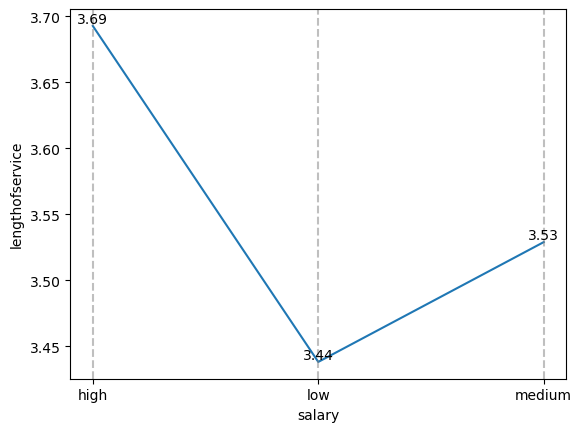

In [24]:
ax = sns.lineplot(df.groupby('salary')['lengthofservice'].mean())

for x,y in zip(df.groupby('salary')['lengthofservice'].mean().index, df.groupby('salary')['lengthofservice'].mean().values):
    ax.text(x, y, str(round(y,2)), ha='center', va='bottom')


for x in df['salary'].unique():
    ax.axvline(x=x, linestyle='--', alpha=0.5, color='gray');

### Salary & Hours 

In [25]:
df.groupby('salary')['hours'].mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: hours, dtype: float64

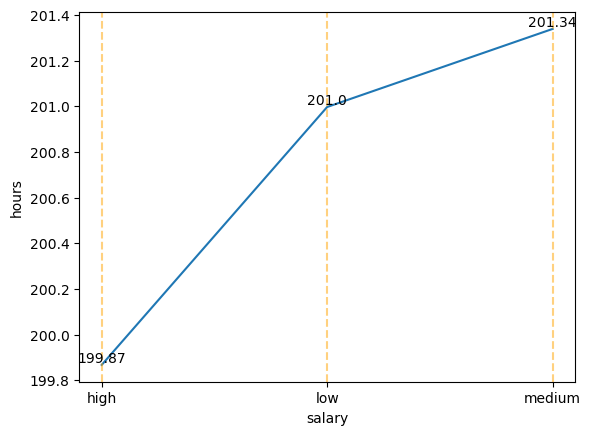

In [26]:
ax = sns.lineplot(df.groupby('salary')['hours'].mean())

for x,y in zip(df.groupby('salary')['hours'].mean().index, df.groupby('salary')['hours'].mean().values):
    ax.text(x, y, str(round(y,2)), ha='center', va='bottom')


for x in df['salary'].unique():
    ax.axvline(x=x, linestyle='--', alpha=0.5, color='orange');

### Salary & Projects

In [27]:
df.groupby('salary')['projects'].mean()

salary
high      3.767179
low       3.799891
medium    3.813528
Name: projects, dtype: float64

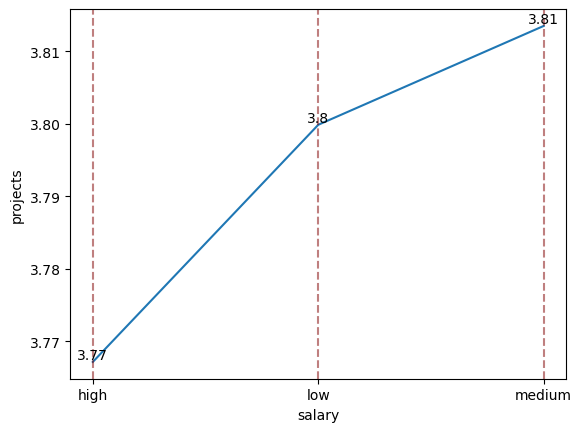

In [28]:
ax = sns.lineplot(df.groupby('salary')['projects'].mean())

for x,y in zip(df.groupby('salary')['projects'].mean().index, df.groupby('salary')['projects'].mean().values):
    ax.text(x, y, str(round(y,2)), ha='center', va='bottom')


for x in df['salary'].unique():
    ax.axvline(x=x, linestyle='--', alpha=0.5, color='maroon');

### Salary & Satisfaction

In [29]:
df.groupby('salary')['satisfaction'].mean()

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction, dtype: float64

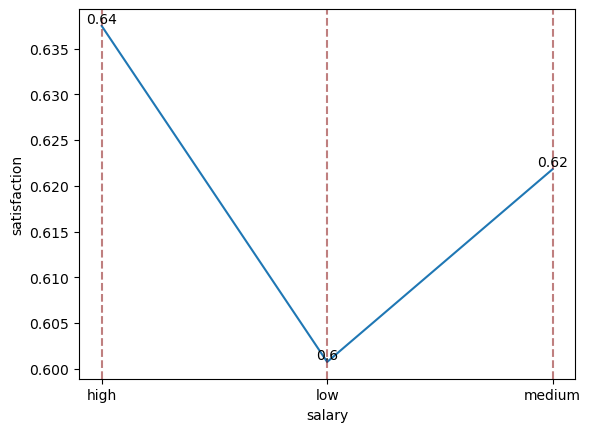

In [30]:
ax = sns.lineplot(df.groupby('salary')['satisfaction'].mean())

for x,y in zip(df.groupby('salary')['satisfaction'].mean().index, df.groupby('salary')['satisfaction'].mean().values):
    ax.text(x, y, str(round(y,2)), ha='center', va='bottom')


for x in df['salary'].unique():
    ax.axvline(x=x, linestyle='--', alpha=0.5, color='maroon');

### Salary Level Distribution per Department

In [31]:
count_df = df.groupby(['department', 'salary']).size().reset_index(name='count')
count_df

department  salary  count
0            IT    high     83
1            IT     low    609
2            IT  medium    535
3         RandD    high     51
4         RandD     low    364
5         RandD  medium    372
6    accounting    high     74
7    accounting     low    358
8    accounting  medium    335
9            hr    high     45
10           hr     low    335
11           hr  medium    359
12   management    high    225
13   management     low    180
14   management  medium    225
15    marketing    high     80
16    marketing     low    402
17    marketing  medium    376
18  product_mng    high     68
19  product_mng     low    451
20  product_mng  medium    383
21        sales    high    269
22        sales     low   2099
23        sales  medium   1772
24      support    high    141
25      support     low   1146
26      support  medium    942
27    technical    high    201
28    technical     low   1372
29    technical  medium   1147

In [32]:
import plotly.graph_objects as go

for dep in count_df.department.unique():
    
    fig = go.Figure(go.Bar(
    x=(df.loc[df['department'] == dep, 'salary'].value_counts(normalize=True) * 100).index,
    y=(df.loc[df['department'] == dep, 'salary'].value_counts(normalize=True) * 100).values,
    text=(df.loc[df['department'] == dep, 'salary'].value_counts(normalize=True) * 100).values.round(1),
    textposition='auto',
    marker_color=['#FF7F0E', '#1F77B4', '#2CA02C']))


    fig.update_layout(
         title=dep,
         xaxis_title='Maaş Seviyesi',
         yaxis_title='Yüzdelik Dilim',
         font=dict(size=14),
         title_font_size=20,
         plot_bgcolor='rgba(0,0,0,0)',
         paper_bgcolor='rgba(0,0,0,0)')

    fig.show()
        

### Departmanlar Arası Low Salary Percentage Kıyaslaması

In [33]:
count_df = df.groupby(['department', 'salary']).size().reset_index(name='count')
count_df

department  salary  count
0            IT    high     83
1            IT     low    609
2            IT  medium    535
3         RandD    high     51
4         RandD     low    364
5         RandD  medium    372
6    accounting    high     74
7    accounting     low    358
8    accounting  medium    335
9            hr    high     45
10           hr     low    335
11           hr  medium    359
12   management    high    225
13   management     low    180
14   management  medium    225
15    marketing    high     80
16    marketing     low    402
17    marketing  medium    376
18  product_mng    high     68
19  product_mng     low    451
20  product_mng  medium    383
21        sales    high    269
22        sales     low   2099
23        sales  medium   1772
24      support    high    141
25      support     low   1146
26      support  medium    942
27    technical    high    201
28    technical     low   1372
29    technical  medium   1147

In [34]:
low = count_df[count_df['salary']=='low']
low

department salary  count
1            IT    low    609
4         RandD    low    364
7    accounting    low    358
10           hr    low    335
13   management    low    180
16    marketing    low    402
19  product_mng    low    451
22        sales    low   2099
25      support    low   1146
28    technical    low   1372

In [35]:
low['total_emp']=count_df.groupby('department')['count'].sum().values
low['perc']=round((low['count']/low['total_emp'])*100, 2)
low_per = low.sort_values('perc', ascending=False)
low_per

department salary  count  total_emp   perc
25      support    low   1146       2229  51.41
22        sales    low   2099       4140  50.70
28    technical    low   1372       2720  50.44
19  product_mng    low    451        902  50.00
1            IT    low    609       1227  49.63
16    marketing    low    402        858  46.85
7    accounting    low    358        767  46.68
4         RandD    low    364        787  46.25
10           hr    low    335        739  45.33
13   management    low    180        630  28.57

In [36]:
fig = px.bar(low_per, x='department', y='perc', color='department', 
             title='Comparison of Low Salary Percentages Among Departments',
             labels={'department':'Department', 'perc':'Percentage'},
            text='perc', template='plotly_dark+presentation')

fig.update_layout(
    xaxis_title='Departments',
    yaxis_title='Percentages',
    legend_title='Departments',
    font=dict(size=14),
    title_font_size=20,
    barmode='overlay',
    width=900,
    height=550
)

fig.update_traces(marker_line_width=0, hovertemplate='<b>%{x}</b><br>Employees: %{y}<br>',
                 textposition='outside', width=0.6)
fig.show()

### Departmanlar Arası Medium Salary Percentage Kıyaslaması

In [37]:
medium = count_df[count_df['salary']=='medium']
medium

department  salary  count
2            IT  medium    535
5         RandD  medium    372
8    accounting  medium    335
11           hr  medium    359
14   management  medium    225
17    marketing  medium    376
20  product_mng  medium    383
23        sales  medium   1772
26      support  medium    942
29    technical  medium   1147

In [38]:
medium['total_emp']=count_df.groupby('department')['count'].sum().values
medium['perc']=round((medium['count']/medium['total_emp'])*100, 2)
medium_per = medium.sort_values('perc', ascending=False)
medium_per

department  salary  count  total_emp   perc
11           hr  medium    359        739  48.58
5         RandD  medium    372        787  47.27
17    marketing  medium    376        858  43.82
8    accounting  medium    335        767  43.68
2            IT  medium    535       1227  43.60
23        sales  medium   1772       4140  42.80
20  product_mng  medium    383        902  42.46
26      support  medium    942       2229  42.26
29    technical  medium   1147       2720  42.17
14   management  medium    225        630  35.71

In [39]:
fig = px.bar(medium_per, x='department', y='perc', color='department', 
             title='Comparison of Medium Salary Percentages Among Departments',
             labels={'department':'Department', 'perc':'Percentage'},
            text='perc', template='plotly_dark+presentation')

fig.update_layout(
    xaxis_title='Departments',
    yaxis_title='Percentages',
    legend_title='Departments',
    font=dict(size=14),
    title_font_size=20,
    barmode='overlay',
    width=900,
    height=550
)

fig.update_traces(marker_line_width=0, hovertemplate='<b>%{x}</b><br>Employees: %{y}<br>',
                 textposition='outside', width=0.6)
fig.show()

### Departmanlar Arası High Salary Percentage Kıyaslaması

In [40]:
high = count_df[count_df['salary']=='high']
high

department salary  count
0            IT   high     83
3         RandD   high     51
6    accounting   high     74
9            hr   high     45
12   management   high    225
15    marketing   high     80
18  product_mng   high     68
21        sales   high    269
24      support   high    141
27    technical   high    201

In [41]:
high['total_emp']=count_df.groupby('department')['count'].sum().values
high['perc']=round((high['count']/high['total_emp'])*100, 2)
high_per = high.sort_values('perc', ascending=False)
high_per

department salary  count  total_emp   perc
12   management   high    225        630  35.71
6    accounting   high     74        767   9.65
15    marketing   high     80        858   9.32
18  product_mng   high     68        902   7.54
27    technical   high    201       2720   7.39
0            IT   high     83       1227   6.76
21        sales   high    269       4140   6.50
3         RandD   high     51        787   6.48
24      support   high    141       2229   6.33
9            hr   high     45        739   6.09

In [42]:
fig = px.bar(high_per, x='department', y='perc', color='department', 
             title='Comparison of High Salary Percentages Among Departments',
             labels={'department':'Department', 'perc':'Percentage'},
            text='perc', template='plotly_dark+presentation')

fig.update_layout(
    xaxis_title='Departments',
    yaxis_title='Percentages',
    legend_title='Departments',
    font=dict(size=14),
    title_font_size=20,
    barmode='overlay',
    width=900,
    height=550
)

fig.update_traces(marker_line_width=0, hovertemplate='<b>%{x}</b><br>Employees: %{y}<br>',
                 textposition='outside', width=0.6)
fig.show()

### Departmanlar Arası Proje Percentage Kıyaslaması

In [43]:
df_dep_pr = df.groupby('department')['projects'].mean().reset_index().rename(columns={'projects':'averageprojects'}).sort_values('averageprojects', ascending=False)
df_dep_pr

department  averageprojects
9    technical         3.877941
4   management         3.860317
1        RandD         3.853875
2   accounting         3.825293
0           IT         3.816626
6  product_mng         3.807095
8      support         3.803948
7        sales         3.776329
5    marketing         3.687646
3           hr         3.654939

In [44]:
fig = px.bar(df_dep_pr, x='department', y='averageprojects', color='department', 
             title='Average Projects per Department',
             labels={'department':'Department', 'averageprojects':'Average No of Projects'},
             text=[f"{val:.2f}" for val in df_dep_pr['averageprojects']], template='plotly_dark+presentation')

fig.update_layout(
    xaxis_title='Departments',
    yaxis_title='Average No of Projects',
    legend_title='Departments',
    font=dict(size=14),
    title_font_size=20,
     yaxis=dict(
        range=[3.6, 3.9] 
    )
)

fig.update_traces(marker_line_width=0, hovertemplate='<b>%{x}</b><br>Employees: %{y}<br>',
                 textposition='outside')
fig.show()

In [45]:
# # df.groupby(['department', 'salary'])['promotion'].sum()
# sal_pro = df.groupby(['salary'])['promotion'].sum().reset_index(name='numofpromotion')
# sal_pro

In [46]:
# fig = px.pie(sal_pro, values='numofpromotion', names='salary', color='salary',
#              title='Number of Promotion per Salary Level',
#              labels={'numofpromotion':'Number of Promotion', 'salary': 'Salary'},
#             template='plotly_dark+presentation')

# fig.update_traces(textinfo='label+percent+value', insidetextfont=dict(color='white', size=15), opacity=0.9,
#                  outsidetextfont={'color':'white', 'size':13}, insidetextorientation='auto', hoverlabel={'align':'left', 'bgcolor':'maroon'})

# fig.update_layout(
#     font=dict(size=14),
#     title_font_size=20
# )

# fig.show()

### Departman - Satisfaction İlişkisi

In [47]:
df.groupby(['department'])['satisfaction'].mean()

department
IT             0.618142
RandD          0.619822
accounting     0.582151
hr             0.598809
management     0.621349
marketing      0.618601
product_mng    0.619634
sales          0.614447
support        0.618300
technical      0.607897
Name: satisfaction, dtype: float64

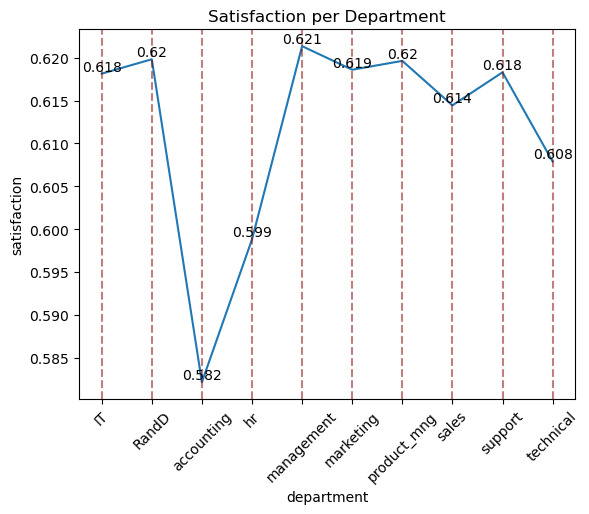

In [48]:
ax = sns.lineplot(df.groupby(['department'])['satisfaction'].mean())

for x,y in zip(df.groupby(['department'])['satisfaction'].mean().index, df.groupby(['department'])['satisfaction'].mean().values):
    ax.text(x, y, str(round(y,3)), ha='center', va='bottom')


for x in df['department'].unique():
    ax.axvline(x=x, linestyle='--', alpha=0.5, color='maroon')

plt.title('Satisfaction per Department')
    
plt.xticks(rotation=45);

# Ayrılanlar Hangi Departmanın Personeli (Yüzde)

In [49]:
df_left = df[(df["left"] == 1)]

In [50]:
df[(df["left"] == 1)]["department"].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: department, dtype: int64

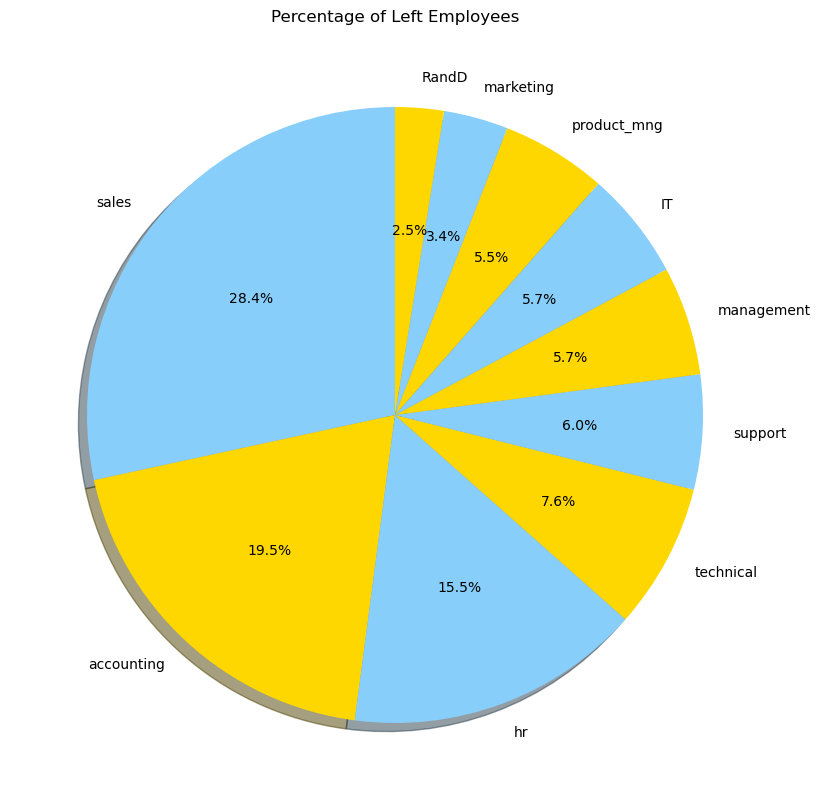

In [51]:
fig = plt.figure(figsize =(12, 10))
plt.pie(df_left["department"].value_counts(normalize=True), 
        labels = depart, autopct='%1.1f%%',shadow=True, startangle=90,
        colors=['LightSkyBlue', 'gold'])
plt.title("Percentage of Left Employees")
plt.show()

## Left Kırılımında maaş levellarına göre personel sayısı ve yüzdesi

In [52]:
df.groupby('left')["salary"].value_counts()

left  salary
0     low       5144
      medium    5129
      high      1155
1     low       2172
      medium    1317
      high        82
Name: salary, dtype: int64

In [53]:
df[(df["left"] == 0) & (df["salary"] =="low")]
salary = ["low","medium","high"]

In [54]:
for sal in salary:
  left1 = df[(df["left"] == 0) & (df["salary"] ==sal)].value_counts().sum()
  left0 = df[(df["left"] == 1) & (df["salary"] ==sal)].value_counts().sum()
  percentage = round(100 - 100 * left1 / (left1 + left0),2)
  print(f" the left percentage for {sal} salary : %{percentage}")

 the left percentage for low salary : %29.69
 the left percentage for medium salary : %20.43
 the left percentage for high salary : %6.63


## Left ve Departman kırılımında maaş levellerine göre personel sayısı

In [55]:
df_left_dep = df.groupby(['left','department'])["salary"].value_counts().reset_index(name='count')
df_left_dep

left   department  salary  count
0      0           IT  medium    438
1      0           IT     low    437
2      0           IT    high     79
3      0        RandD  medium    310
4      0        RandD     low    309
5      0        RandD    high     47
6      0   accounting     low    259
7      0   accounting  medium    235
8      0   accounting    high     69
9      0           hr     low    243
10     0           hr  medium    242
11     0           hr    high     39
12     0   management    high    224
13     0   management  medium    194
14     0   management     low    121
15     0    marketing  medium    308
16     0    marketing     low    276
17     0    marketing    high     71
18     0  product_mng     low    346
19     0  product_mng  medium    296
20     0  product_mng    high     62
21     0        sales  medium   1469
22     0        sales     low   1402
23     0        sales    high    255
24     0      support  medium    784
25     0      support     low    757
26     0      support    high    133
27     0    technical     low    994
28     0    technical  medium    853
29     0    technical    high    176
30     1           IT     low    172
31     1           IT  medium     97
32     1           IT    high      4
33     1        RandD  medium     62
34     1        RandD     low     55
35     1        RandD    high      4
36     1   accounting  medium    100
37     1   accounting     low     99
38     1   accounting    high      5
39     1           hr  medium    117
40     1           hr     low     92
41     1           hr    high      6
42     1   management     low     59
43     1   management  medium     31
44     1   management    high      1
45     1    marketing     low    126
46     1    marketing  medium     68
47     1    marketing    high      9
48     1  product_mng     low    105
49     1  product_mng  medium     87
50     1  product_mng    high      6
51     1        sales     low    697
52     1        sales  medium    303
53     1        sales    high     14
54     1      support     low    389
55     1      support  medium    158
56     1      support    high      8
57     1    technical     low    378
58     1    technical  medium    294
59     1    technical    high     25

In [56]:
fig = px.bar(df_left_dep, x='department', y='count', color='salary', 
             barmode='group', text='count', hover_name='department', 
             color_discrete_sequence=['#E69F00', '#67392F', '#FFFFFF'], 
             facet_row='left', height=650, title='Number of Employee per Left & Salary')

fig.update_traces(opacity=1, marker_line_width=1.5, marker_line_color='rgb(8,48,107)',
                  textposition='outside', texttemplate='%{y:.2f}')

fig.update_layout(template='plotly_dark', yaxis_tickformat="g")

fig.show()

### Departman - Salary - Satisfaction İlişkisi

In [57]:
dep_sal_sat = df.groupby(['department', 'salary'])['satisfaction'].mean().reset_index(name='satisfaction_avg')
dep_sal_sat

department  salary  satisfaction_avg
0            IT    high          0.638193
1            IT     low          0.610099
2            IT  medium          0.624187
3         RandD    high          0.586667
4         RandD     low          0.623929
5         RandD  medium          0.620349
6    accounting    high          0.614054
7    accounting     low          0.574162
8    accounting  medium          0.583642
9            hr    high          0.673111
10           hr     low          0.608657
11           hr  medium          0.580306
12   management    high          0.653333
13   management     low          0.610722
14   management  medium          0.597867
15    marketing    high          0.605250
16    marketing     low          0.602910
17    marketing  medium          0.638218
18  product_mng    high          0.614118
19  product_mng     low          0.620909
20  product_mng  medium          0.619112
21        sales    high          0.648959
22        sales     low          0.600838
23        sales  medium          0.625327
24      support    high          0.655035
25      support     low          0.591710
26      support  medium          0.645149
27    technical    high          0.625970
28    technical     low          0.594322
29    technical  medium          0.620968

In [58]:
fig = px.bar(dep_sal_sat, x='department', y='satisfaction_avg', color='salary', 
             barmode='group', text='satisfaction_avg', hover_name='department', 
             color_discrete_sequence=['#E69F00', '#67392F', '#FFFFFF'], title='Satisfaction per Department & Salary')

fig.update_traces(opacity=1, marker_line_width=1.5, marker_line_color='rgb(8,48,107)',
                  textposition='outside', texttemplate='%{y:.2f}')

fig.update_layout(template='plotly_dark', yaxis_tickformat=".0")

fig.show()

### Departman - Salary - Left - Satisfaction İlişkisi

In [59]:
dep_sal_sat_left = df.groupby(['department', 'salary', 'left'])['satisfaction'].mean().reset_index(name='satisfaction_avg')
dep_sal_sat_left

department  salary  left  satisfaction_avg
0            IT    high     0          0.641013
1            IT    high     1          0.582500
2            IT     low     0          0.681648
3            IT     low     1          0.428314
4            IT  medium     0          0.679224
5            IT  medium     1          0.375670
6         RandD    high     0          0.607021
7         RandD    high     1          0.347500
8         RandD     low     0          0.651294
9         RandD     low     1          0.470182
10        RandD  medium     0          0.663387
11        RandD  medium     1          0.405161
12   accounting    high     0          0.635217
13   accounting    high     1          0.322000
14   accounting     low     0          0.643282
15   accounting     low     1          0.393333
16   accounting  medium     0          0.655064
17   accounting  medium     1          0.415800
18           hr    high     0          0.735897
19           hr    high     1          0.265000
20           hr     low     0          0.658560
21           hr     low     1          0.476848
22           hr  medium     0          0.663678
23           hr  medium     1          0.407863
24   management    high     0          0.654375
25   management    high     1          0.420000
26   management     low     0          0.680496
27   management     low     1          0.467627
28   management  medium     0          0.639433
29   management  medium     1          0.337742
30    marketing    high     0          0.628310
31    marketing    high     1          0.423333
32    marketing     low     0          0.675833
33    marketing     low     1          0.443175
34    marketing  medium     0          0.674123
35    marketing  medium     1          0.475588
36  product_mng    high     0          0.641935
37  product_mng    high     1          0.326667
38  product_mng     low     0          0.661908
39  product_mng     low     1          0.485810
40  product_mng  medium     0          0.657905
41  product_mng  medium     1          0.487126
42        sales    high     0          0.660039
43        sales    high     1          0.447143
44        sales     low     0          0.669365
45        sales     low     1          0.462999
46        sales  medium     0          0.669244
47        sales  medium     1          0.412409
48      support    high     0          0.662406
49      support    high     1          0.532500
50      support     low     0          0.673435
51      support     low     1          0.432674
52      support  medium     0          0.676084
53      support  medium     1          0.491646
54    technical    high     0          0.646705
55    technical    high     1          0.480000
56    technical     low     0          0.668833
57    technical     low     1          0.398386
58    technical  medium     0          0.672181
59    technical  medium     1          0.472381

In [60]:
fig = px.bar(dep_sal_sat_left, x='department', y='satisfaction_avg', color='salary', 
             barmode='group', text='satisfaction_avg', hover_name='department', 
             color_discrete_sequence=['#E69F00', '#67392F', '#FFFFFF'], 
             facet_row='left', height=650, title='Satisfaction per Department & Salary by Left')

fig.update_traces(opacity=1, marker_line_width=1.5, marker_line_color='rgb(8,48,107)',
                  textposition='outside', texttemplate='%{y:.2f}')

fig.update_layout(template='plotly_dark', yaxis_tickformat=".0")

fig.show()

### Departman - Length of Service İlişkisi

In [61]:
df.groupby('department')['lengthofservice'].mean()

department
IT             3.468623
RandD          3.367217
accounting     3.522816
hr             3.355886
management     4.303175
marketing      3.569930
product_mng    3.475610
sales          3.534058
support        3.393001
technical      3.411397
Name: lengthofservice, dtype: float64

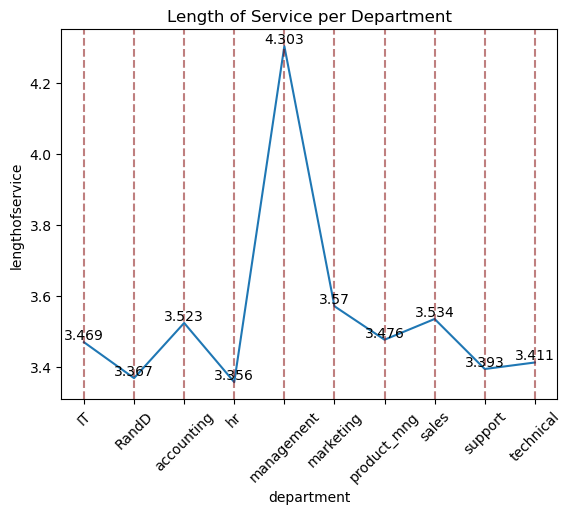

In [62]:
ax = sns.lineplot(df.groupby('department')['lengthofservice'].mean())

for x,y in zip(df.groupby('department')['lengthofservice'].mean().index, df.groupby('department')['lengthofservice'].mean().values):
    ax.text(x, y, str(round(y,3)), ha='center', va='bottom')


for x in df['department'].unique():
    ax.axvline(x=x, linestyle='--', alpha=0.5, color='maroon')
    
plt.title('Length of Service per Department')
    
plt.xticks(rotation=45);

### Length of Service - Left İlişkisi

In [63]:
len_left = df.groupby('left')['lengthofservice'].mean().reset_index(name='lengthofservice_avg')
len_left

left  lengthofservice_avg
0     0             3.380032
1     1             3.876505

In [64]:
fig = px.bar(len_left, x='left', y='lengthofservice_avg', 
             barmode='group', text='lengthofservice_avg', 
             color_discrete_sequence=[ '#67392F'], title = 'Length of Service per Left')

fig.update_traces(opacity=0.95, marker_line_width=1.5, marker_line_color='rgb(8,48,107)',
                  textposition='outside', texttemplate='%{y:.2f}')

fig.update_layout(template='plotly_dark', yaxis_tickformat=".0")

fig.show()

### Departman - Salary -  Length of Service İlişkisi

In [65]:
dep_sal_len = df.groupby(['department', 'salary'])['lengthofservice'].mean().reset_index(name='lengthofservice_avg')
dep_sal_len

department  salary  lengthofservice_avg
0            IT    high             3.072289
1            IT     low             3.438424
2            IT  medium             3.564486
3         RandD    high             3.529412
4         RandD     low             3.381868
5         RandD  medium             3.330645
6    accounting    high             3.216216
7    accounting     low             3.438547
8    accounting  medium             3.680597
9            hr    high             2.911111
10           hr     low             3.259701
11           hr  medium             3.501393
12   management    high             5.164444
13   management     low             3.411111
14   management  medium             4.155556
15    marketing    high             3.512500
16    marketing     low             3.527363
17    marketing  medium             3.627660
18  product_mng    high             3.617647
19  product_mng     low             3.434590
20  product_mng  medium             3.498695
21        sales    high             3.550186
22        sales     low             3.464030
23        sales  medium             3.614560
24      support    high             3.219858
25      support     low             3.484293
26      support  medium             3.307856
27    technical    high             3.313433
28    technical     low             3.397230
29    technical  medium             3.445510

In [66]:
fig = px.bar(dep_sal_len, x='department', y='lengthofservice_avg', color='salary', 
             barmode='group', text='lengthofservice_avg', hover_name='department', 
             color_discrete_sequence=['#E69F00', '#67392F', '#FFFFFF'], title = 'Length of Service per Department & Salary')

fig.update_traces(opacity=1, marker_line_width=1.5, marker_line_color='rgb(8,48,107)',
                  textposition='outside', texttemplate='%{y:.2f}')

fig.update_layout(template='plotly_dark', yaxis_tickformat=".0")

fig.show()

### Departman - Salary - Left - Length of Service İlişkisi

In [67]:
dep_sel_left_len = df.groupby(['department', 'salary', 'left'])['lengthofservice'].mean().reset_index(name='lengthofservice_avg')
dep_sel_left_len

department  salary  left  lengthofservice_avg
0            IT    high     0             3.025316
1            IT    high     1             4.000000
2            IT     low     0             3.254005
3            IT     low     1             3.906977
4            IT  medium     0             3.518265
5            IT  medium     1             3.773196
6         RandD    high     0             3.553191
7         RandD    high     1             3.250000
8         RandD     low     0             3.268608
9         RandD     low     1             4.018182
10        RandD  medium     0             3.190323
11        RandD  medium     1             4.032258
12   accounting    high     0             3.217391
13   accounting    high     1             3.200000
14   accounting     low     0             3.320463
15   accounting     low     1             3.747475
16   accounting  medium     0             3.600000
17   accounting  medium     1             3.870000
18           hr    high     0             2.820513
19           hr    high     1             3.500000
20           hr     low     0             3.061728
21           hr     low     1             3.782609
22           hr  medium     0             3.384298
23           hr  medium     1             3.743590
24   management    high     0             5.169643
25   management    high     1             4.000000
26   management     low     0             3.264463
27   management     low     1             3.711864
28   management  medium     0             4.206186
29   management  medium     1             3.838710
30    marketing    high     0             3.577465
31    marketing    high     1             3.000000
32    marketing     low     0             3.351449
33    marketing     low     1             3.912698
34    marketing  medium     0             3.574675
35    marketing  medium     1             3.867647
36  product_mng    high     0             3.645161
37  product_mng    high     1             3.333333
38  product_mng     low     0             3.234104
39  product_mng     low     1             4.095238
40  product_mng  medium     0             3.378378
41  product_mng  medium     1             3.908046
42        sales    high     0             3.509804
43        sales    high     1             4.285714
44        sales     low     0             3.281027
45        sales     low     1             3.832138
46        sales  medium     0             3.587474
47        sales  medium     1             3.745875
48      support    high     0             3.180451
49      support    high     1             3.875000
50      support     low     0             3.282695
51      support     low     1             3.876607
52      support  medium     0             3.153061
53      support  medium     1             4.075949
54    technical    high     0             3.250000
55    technical    high     1             3.760000
56    technical     low     0             3.197183
57    technical     low     1             3.923280
58    technical  medium     0             3.246190
59    technical  medium     1             4.023810

In [68]:
fig = px.bar(dep_sel_left_len, x='department', y='lengthofservice_avg', color='salary', 
             barmode='group', text='lengthofservice_avg', hover_name='department', 
             color_discrete_sequence=['#E69F00', '#67392F', '#FFFFFF'], 
             facet_row='left', height=650, title='Length of Service per Department & Salary by Left')

fig.update_traces(opacity=1, marker_line_width=1.5, marker_line_color='rgb(8,48,107)',
                  textposition='outside', texttemplate='%{y:.2f}')

fig.update_layout(template='plotly_dark', yaxis_tickformat=".0")

fig.show()

In [69]:
df.head(1)

satisfaction  evaluation  projects  hours  lengthofservice  accident  \
0          0.38        0.53         2    157                3         0   

   promotion department salary  left  
0          0      sales    low     1

In [70]:
df.groupby('left')['promotion'].value_counts().reset_index(name='numofemployee')

left  promotion  numofemployee
0     0          0          11128
1     0          1            300
2     1          0           3552
3     1          1             19

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

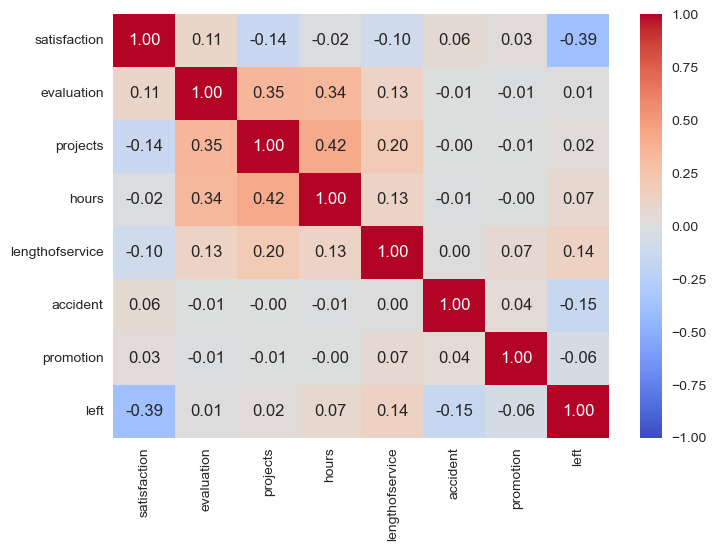

In [308]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1,cmap="coolwarm");

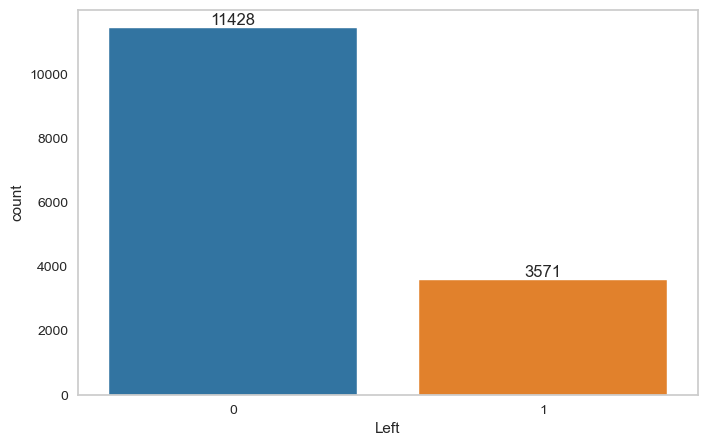

In [309]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="left", data=df, palette="tab10")
plt.xlabel("Left")
ax.bar_label(ax.containers[0]);

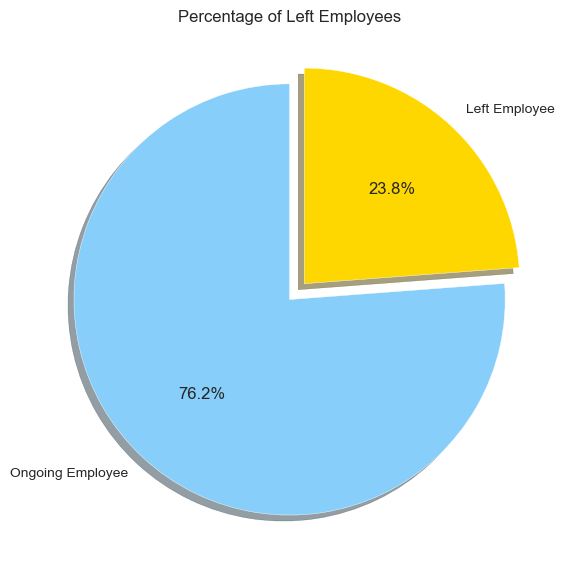

In [310]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df.left.value_counts(normalize=True), 
        labels = ["Ongoing Employee","Left Employee"], explode = (0, 0.1),autopct='%1.1f%%',shadow=True, startangle=90,
        colors=['LightSkyBlue', 'gold'])
plt.title("Percentage of Left Employees")
plt.show()

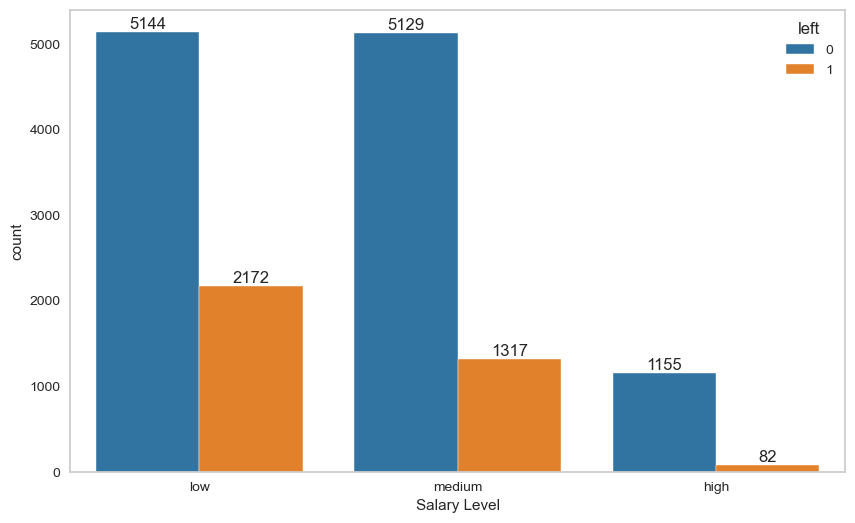

In [317]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="salary", hue="left", data=df, palette = "tab10")
plt.xlabel("Salary Level")
for i in ax.containers:
    ax.bar_label(i)

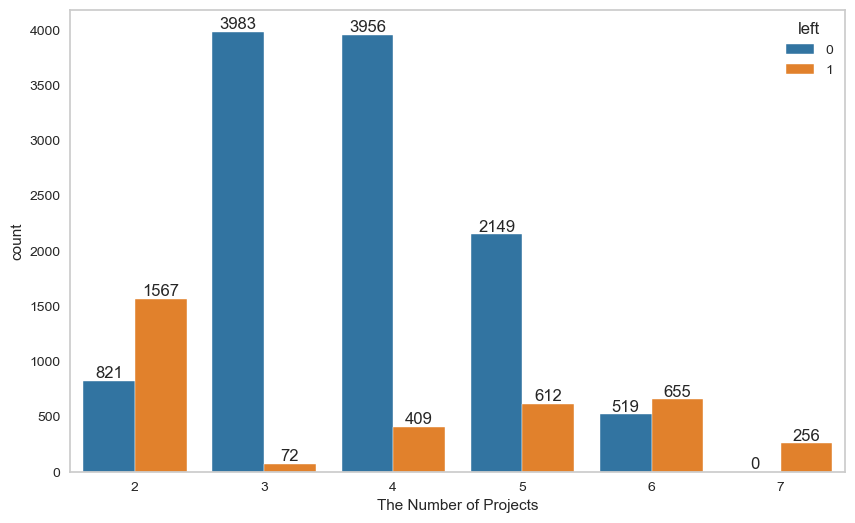

In [316]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="projects", hue = "left", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
for i in ax.containers:
    ax.bar_label(i);

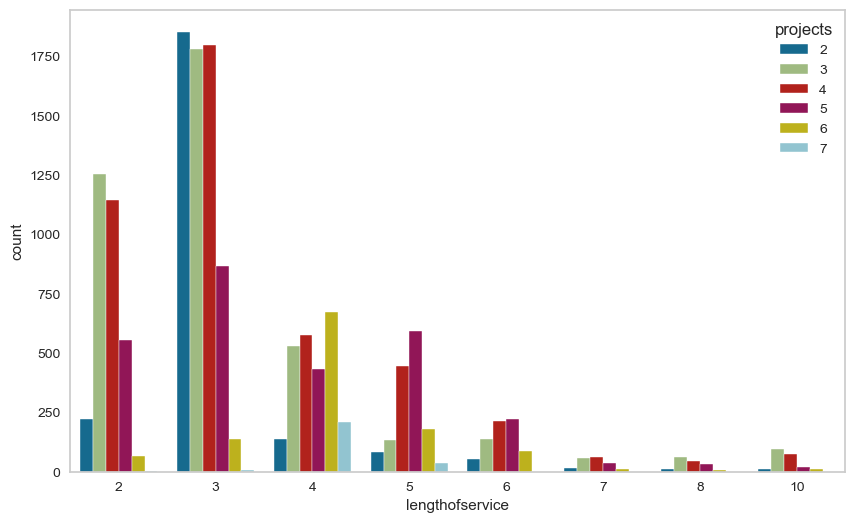

In [319]:
plt.figure(figsize=(10,6))
sns.countplot(x="lengthofservice", hue="projects", data=df);

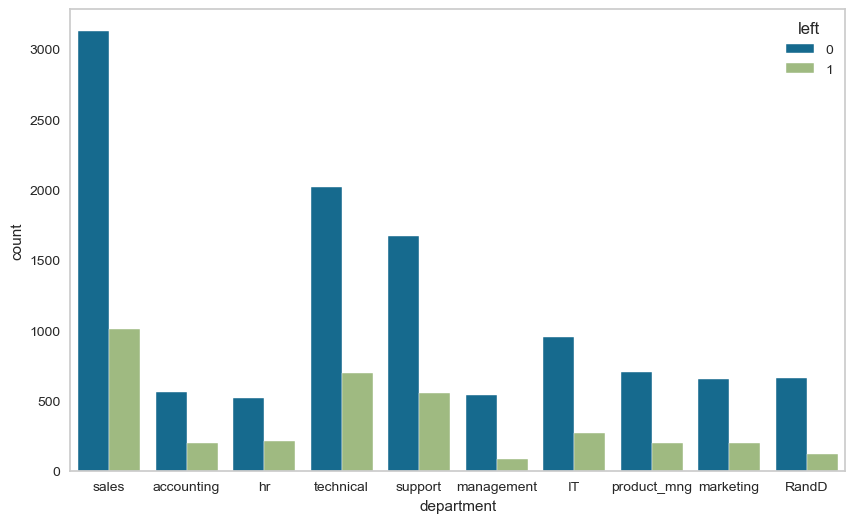

In [320]:
plt.figure(figsize=(10,6))
sns.countplot(x="department",hue="left", data=df);

In [321]:
num = df.select_dtypes(exclude="O").columns
num

Index(['satisfaction', 'evaluation', 'projects', 'hours', 'lengthofservice',
       'accident', 'promotion', 'left'],
      dtype='object')

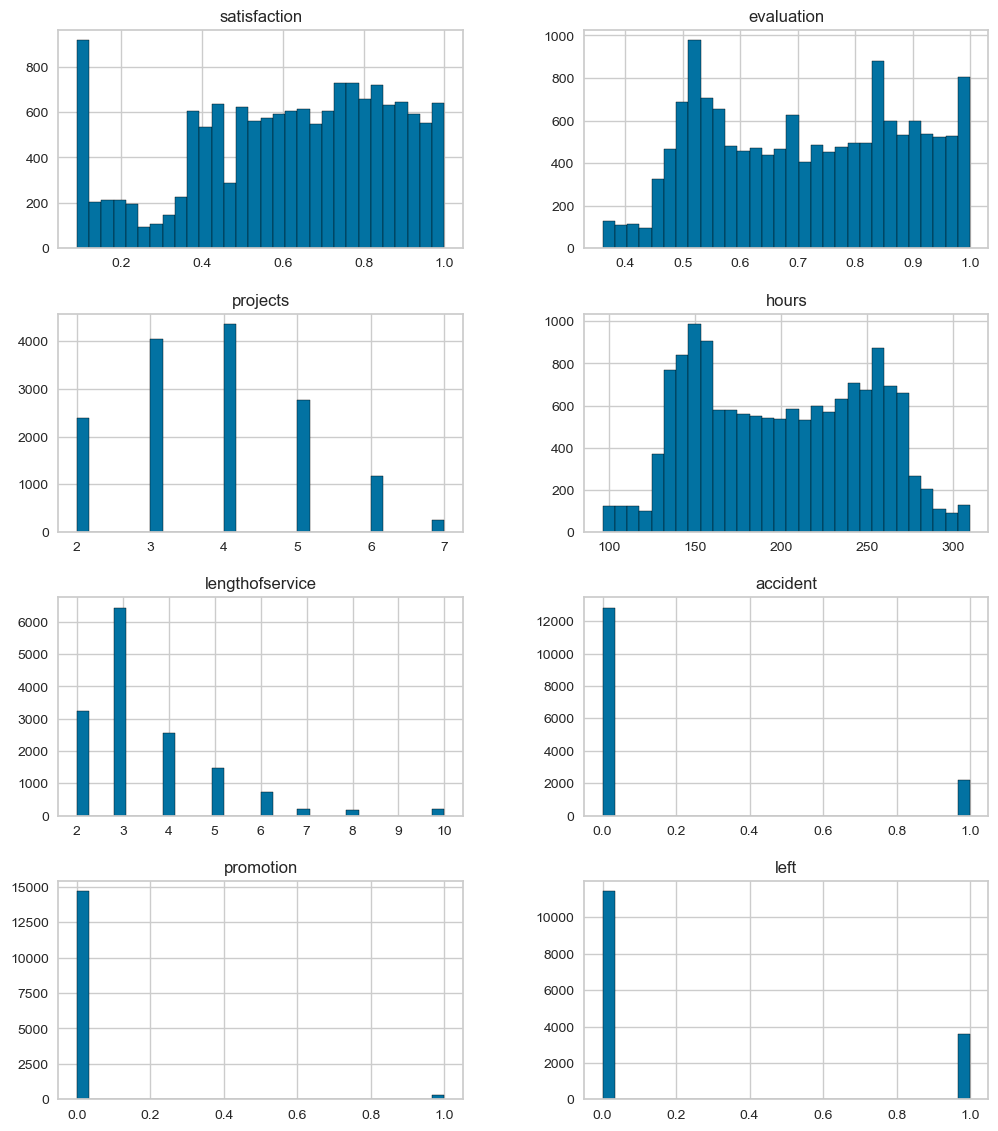

In [322]:
fig_ = df[num].hist(figsize=(12, 36), layout=(10,2), bins=30, edgecolor="black");
#buraya bir bakalım.

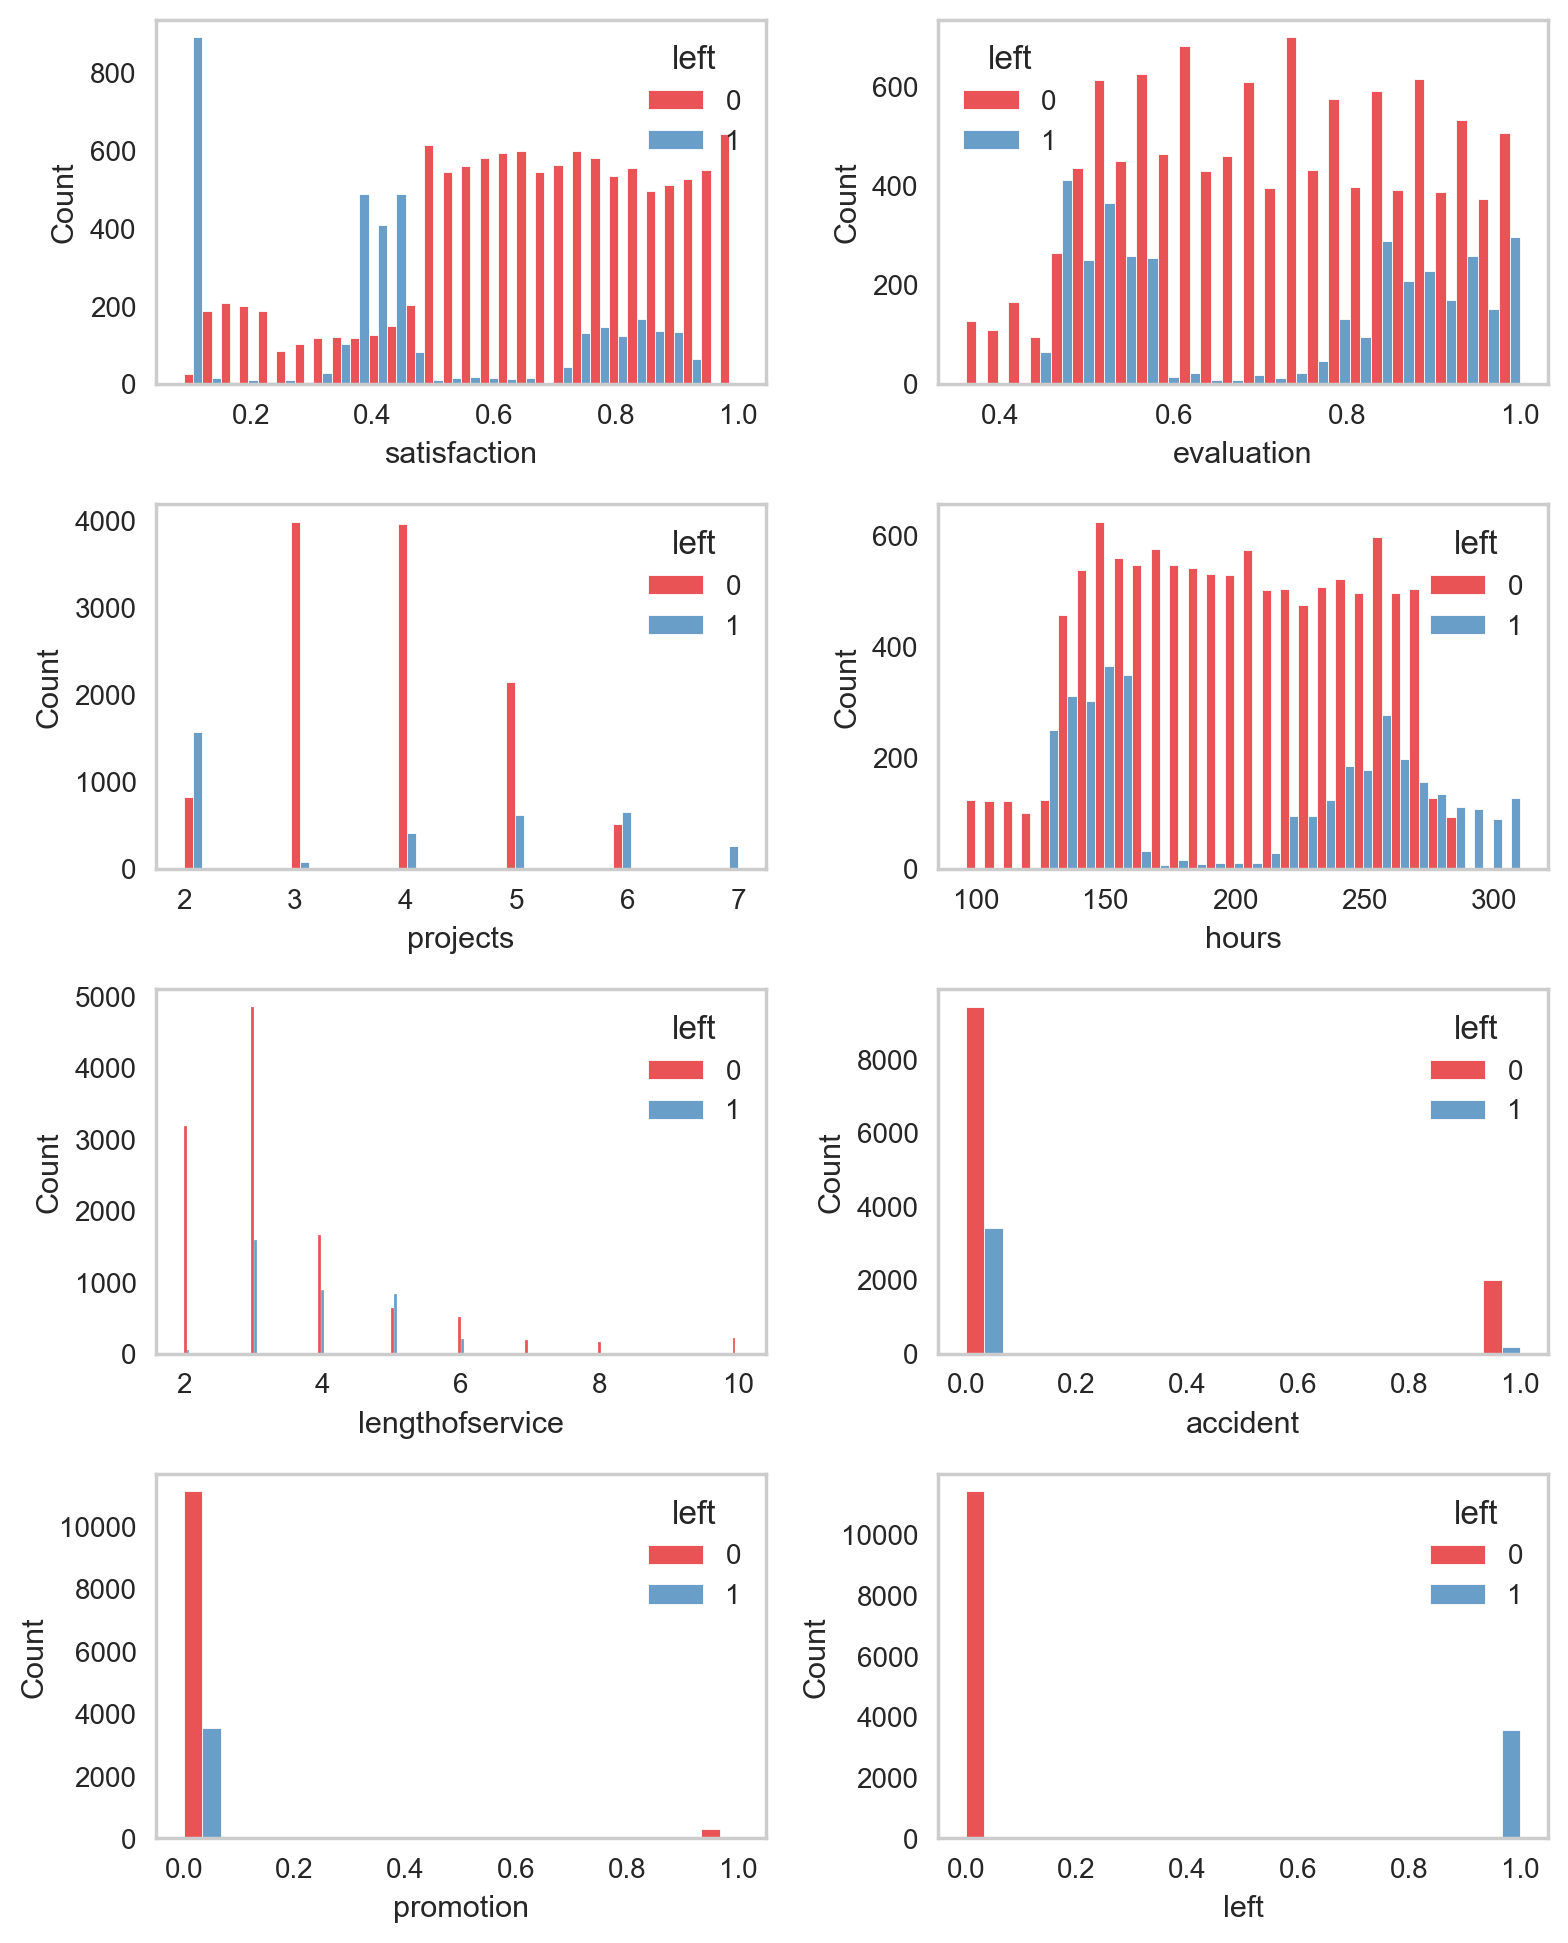

In [323]:
fig = plt.figure(figsize=(8,24), dpi=200)
for i, col in enumerate(df[num]):
        plt.subplot(10,2,i+1)
        sns.histplot(x= col, hue="left", data=df, multiple="dodge", palette="Set1"
                    )
plt.tight_layout();

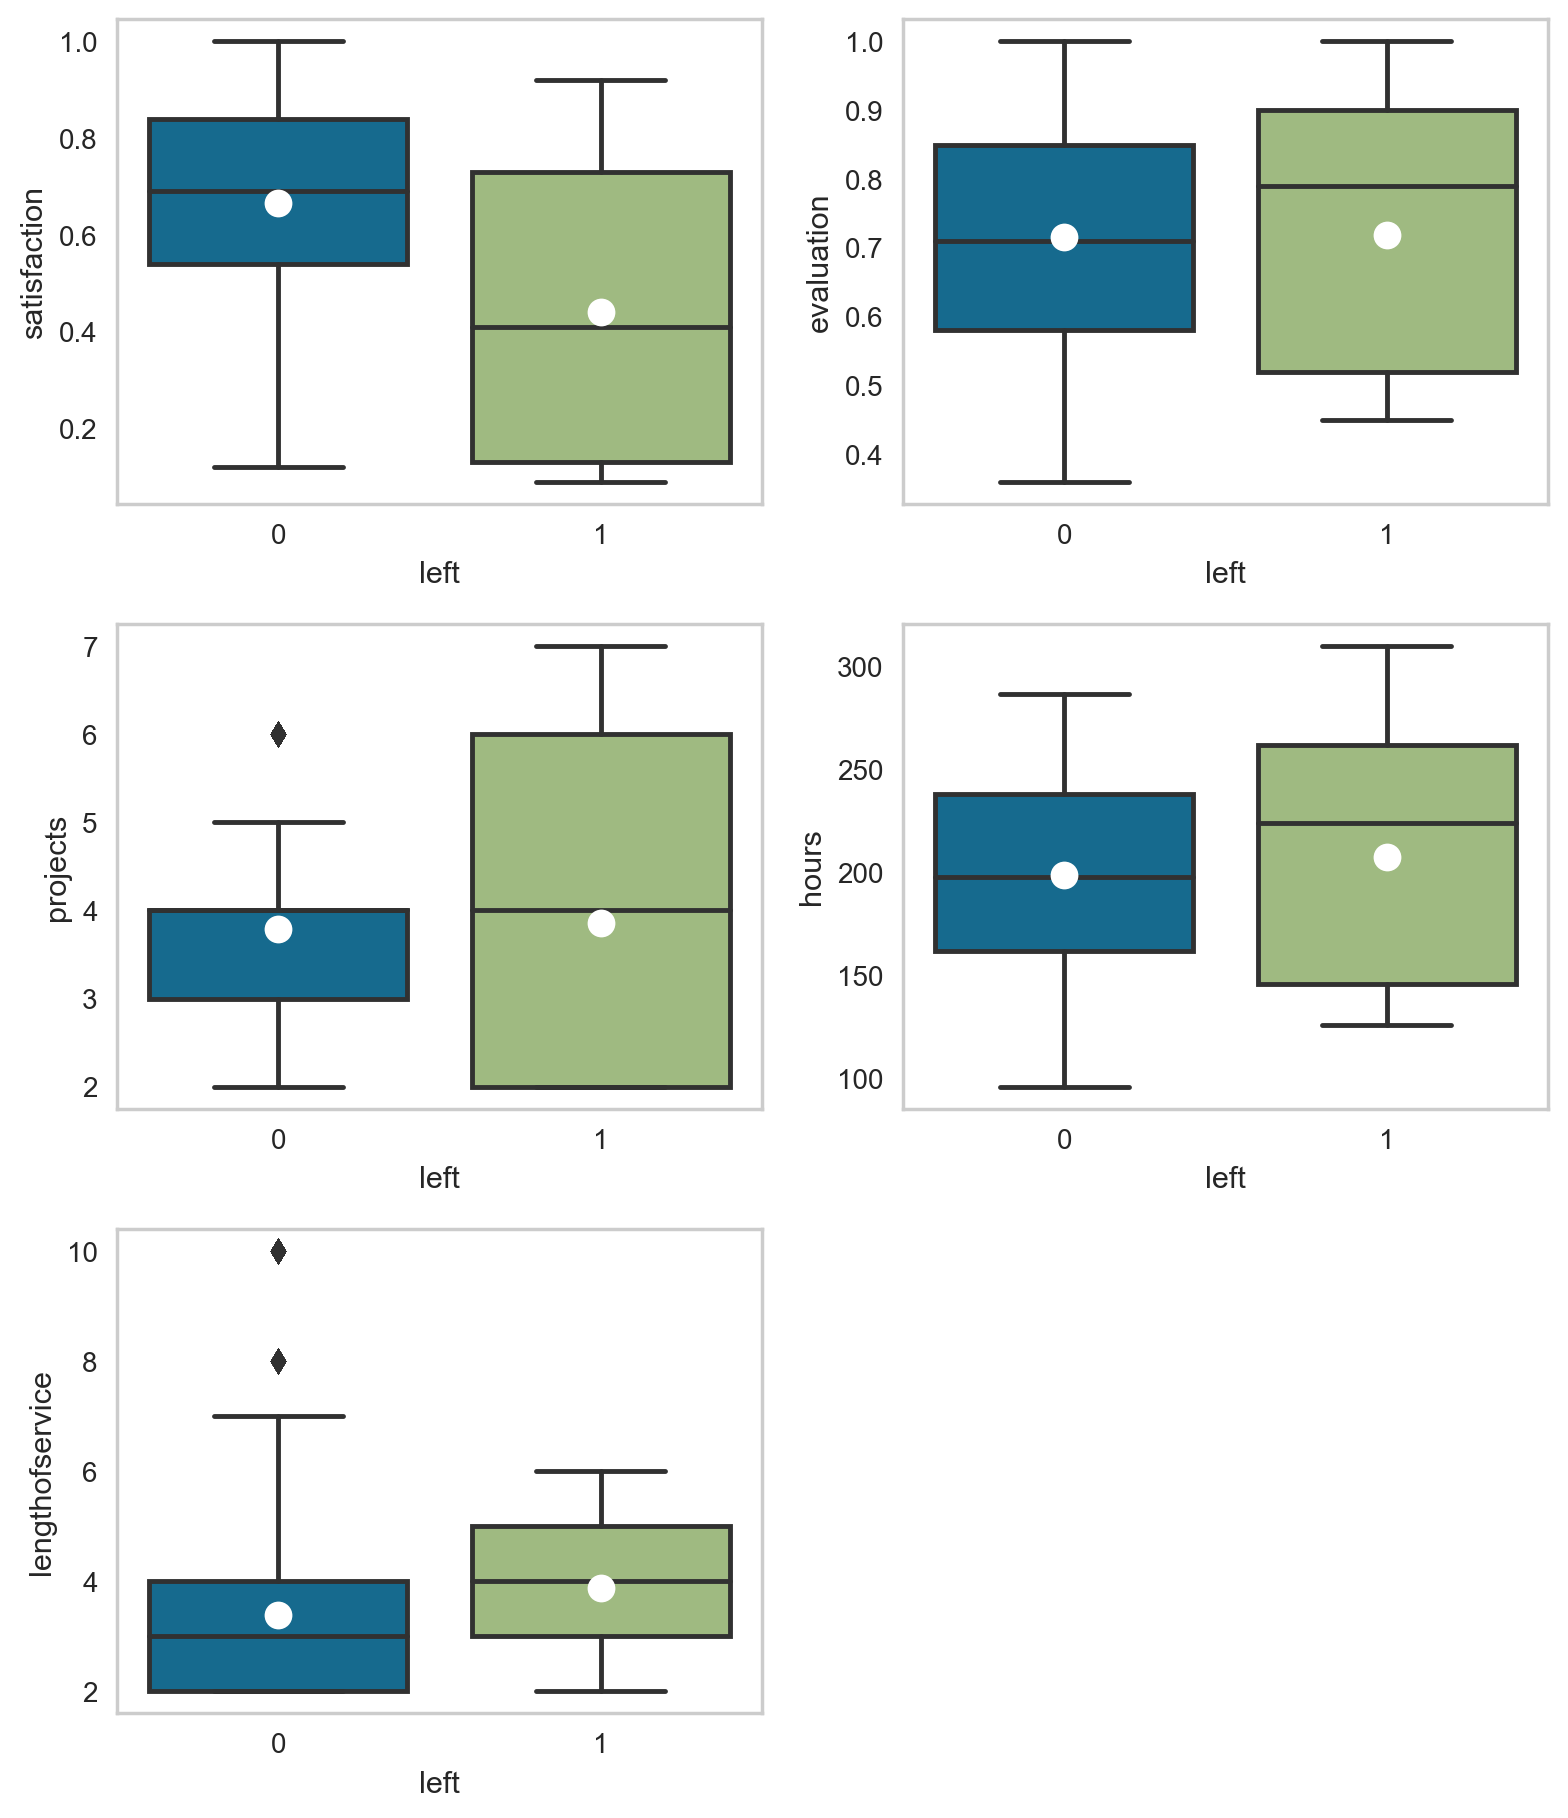

In [324]:
fig = plt.figure(figsize=(8,30), dpi=200)
for i, col in enumerate(df[num].iloc[:,:-3]):
        plt.subplot(10,2,i+1)
        sns.boxplot(x= "left", y=col, data=df,
                    showmeans=True,
                    meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.tight_layout();

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


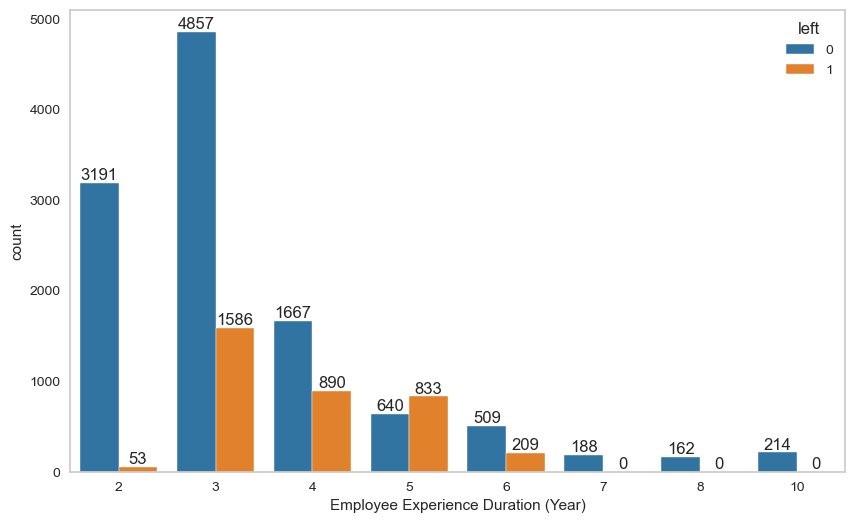

In [326]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="lengthofservice", hue="left", data=df, palette = "tab10")
plt.xlabel("Employee Experience Duration (Year)")
for i in ax.containers:
    ax.bar_label(i)

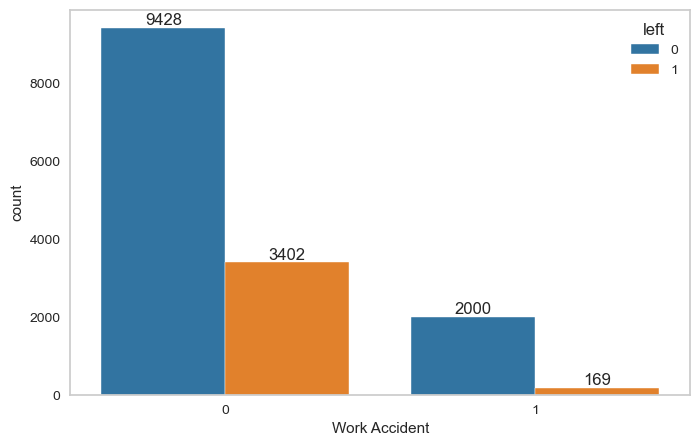

In [327]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="accident", hue="left", data=df, palette = "tab10")
plt.xlabel("Work Accident")
for i in ax.containers:
    ax.bar_label(i)

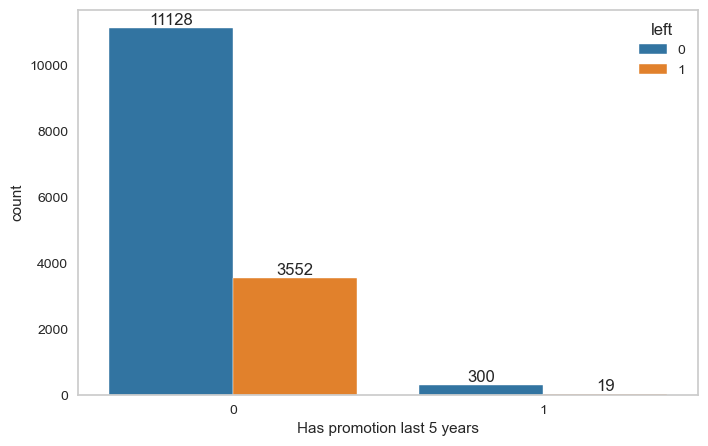

In [328]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="promotion", hue="left", data=df, palette = "tab10")
plt.xlabel("Has promotion last 5 years")
for i in ax.containers:
    ax.bar_label(i)

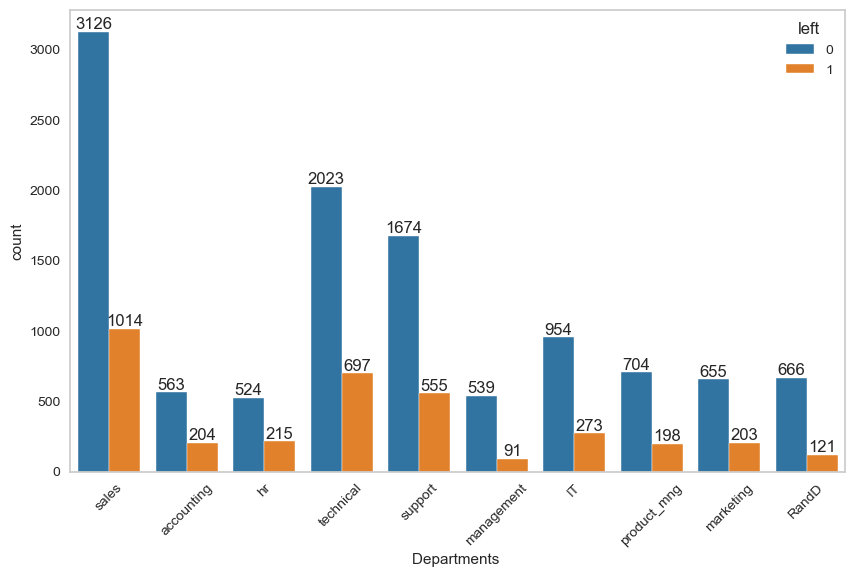

In [330]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="department", hue="left", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

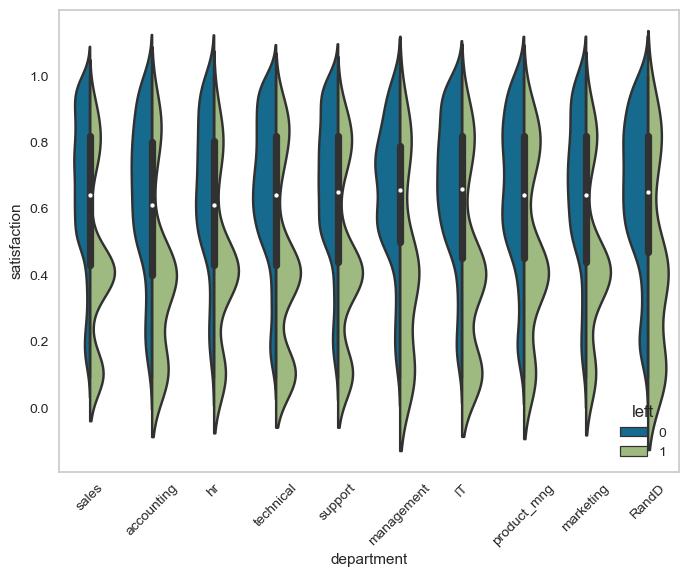

In [337]:
plt.figure(figsize=(8,6))
sns.violinplot (y="satisfaction", x="department", data=df, hue="left", split=True)
plt.xticks(rotation=45);

## 3. Data Pre-Processing

In [71]:
df_copy = df.copy()
df_copy

satisfaction  evaluation  projects  hours  lengthofservice  accident  \
0              0.38        0.53         2    157                3         0   
1              0.80        0.86         5    262                6         0   
2              0.11        0.88         7    272                4         0   
3              0.72        0.87         5    223                5         0   
4              0.37        0.52         2    159                3         0   
...             ...         ...       ...    ...              ...       ...   
14994          0.40        0.57         2    151                3         0   
14995          0.37        0.48         2    160                3         0   
14996          0.37        0.53         2    143                3         0   
14997          0.11        0.96         6    280                4         0   
14998          0.37        0.52         2    158                3         0   

       promotion department  salary  left  
0              0      sales     low     1  
1              0      sales  medium     1  
2              0      sales  medium     1  
3              0      sales     low     1  
4              0      sales     low     1  
...          ...        ...     ...   ...  
14994          0    support     low     1  
14995          0    support     low     1  
14996          0    support     low     1  
14997          0    support     low     1  
14998          0    support     low     1  

[14999 rows x 10 columns]

#### Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [73]:
ordinal_encoder = OrdinalEncoder()
df_copy["department"] = ordinal_encoder.fit_transform(df_copy[["department"]])

In [74]:
df_copy.head()

satisfaction  evaluation  projects  hours  lengthofservice  accident  \
0          0.38        0.53         2    157                3         0   
1          0.80        0.86         5    262                6         0   
2          0.11        0.88         7    272                4         0   
3          0.72        0.87         5    223                5         0   
4          0.37        0.52         2    159                3         0   

   promotion  department  salary  left  
0          0         7.0     low     1  
1          0         7.0  medium     1  
2          0         7.0  medium     1  
3          0         7.0     low     1  
4          0         7.0     low     1

In [75]:
df_copy = pd.get_dummies(df_copy, columns=["salary"])
df_copy

satisfaction  evaluation  projects  hours  lengthofservice  accident  \
0              0.38        0.53         2    157                3         0   
1              0.80        0.86         5    262                6         0   
2              0.11        0.88         7    272                4         0   
3              0.72        0.87         5    223                5         0   
4              0.37        0.52         2    159                3         0   
...             ...         ...       ...    ...              ...       ...   
14994          0.40        0.57         2    151                3         0   
14995          0.37        0.48         2    160                3         0   
14996          0.37        0.53         2    143                3         0   
14997          0.11        0.96         6    280                4         0   
14998          0.37        0.52         2    158                3         0   

       promotion  department  left  salary_high  salary_low  salary_medium  
0              0         7.0     1            0           1              0  
1              0         7.0     1            0           0              1  
2              0         7.0     1            0           0              1  
3              0         7.0     1            0           1              0  
4              0         7.0     1            0           1              0  
...          ...         ...   ...          ...         ...            ...  
14994          0         8.0     1            0           1              0  
14995          0         8.0     1            0           1              0  
14996          0         8.0     1            0           1              0  
14997          0         8.0     1            0           1              0  
14998          0         8.0     1            0           1              0  

[14999 rows x 12 columns]

In [76]:
df_kmeans = df_copy[['satisfaction', 'evaluation']]
df_kmeans

satisfaction  evaluation
0              0.38        0.53
1              0.80        0.86
2              0.11        0.88
3              0.72        0.87
4              0.37        0.52
...             ...         ...
14994          0.40        0.57
14995          0.37        0.48
14996          0.37        0.53
14997          0.11        0.96
14998          0.37        0.52

[14999 rows x 2 columns]

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_kmeans)
scaled_df

array([[0.31868132, 0.265625  ],
       [0.78021978, 0.78125   ],
       [0.02197802, 0.8125    ],
       ...,
       [0.30769231, 0.265625  ],
       [0.02197802, 0.9375    ],
       [0.30769231, 0.25      ]])

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [79]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=2, tol = 0.0001, max_iter=3000, random_state=42)

In [80]:
K_means_model.fit(scaled_df)

KMeans(max_iter=3000, n_clusters=2, random_state=42)

In [81]:
K_means_model.predict(scaled_df)

array([1, 0, 1, ..., 1, 1, 1])

In [82]:
KMeans_cluster = K_means_model.labels_
KMeans_cluster

array([1, 0, 1, ..., 1, 1, 1])

In [83]:
df_kmeans['pred']=KMeans_cluster
df_kmeans['left']=df_copy['left']
df_kmeans

satisfaction  evaluation  pred  left
0              0.38        0.53     1     1
1              0.80        0.86     0     1
2              0.11        0.88     1     1
3              0.72        0.87     0     1
4              0.37        0.52     1     1
...             ...         ...   ...   ...
14994          0.40        0.57     1     1
14995          0.37        0.48     1     1
14996          0.37        0.53     1     1
14997          0.11        0.96     1     1
14998          0.37        0.52     1     1

[14999 rows x 4 columns]

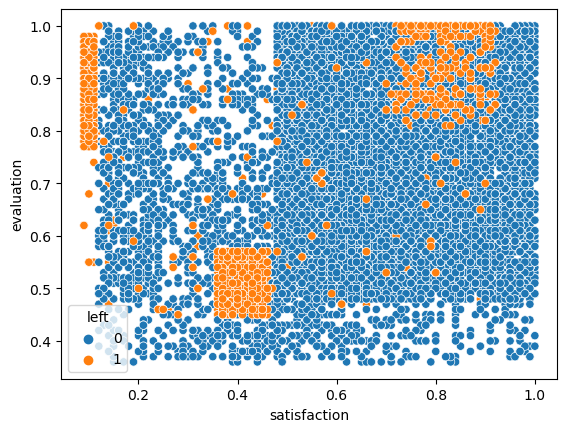

In [84]:
sns.scatterplot(data=df_kmeans, x='satisfaction', y='evaluation', hue='left');

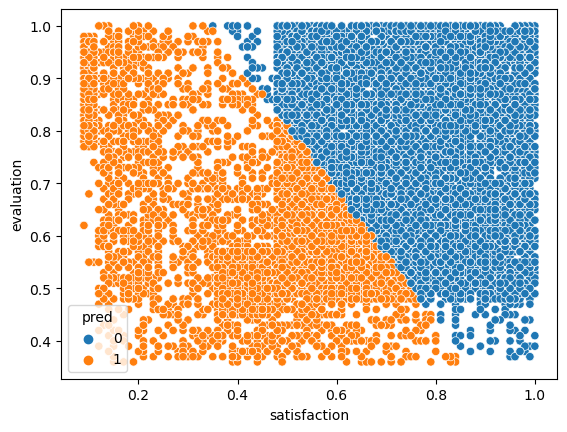

In [85]:
sns.scatterplot(data=df_kmeans, x='satisfaction', y='evaluation', hue='pred');

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

print("Results:")
print()
print(confusion_matrix(df_copy['left'], df_kmeans['pred']))
print()
print(classification_report(df_copy['left'], df_kmeans['pred'])) 

Results:

[[7584 3844]
 [ 988 2583]]

              precision    recall  f1-score   support

           0       0.88      0.66      0.76     11428
           1       0.40      0.72      0.52      3571

    accuracy                           0.68     14999
   macro avg       0.64      0.69      0.64     14999
weighted avg       0.77      0.68      0.70     14999



## 5. Model Building

### Split Data as Train and Test Set

In [87]:
df_copy.head()

satisfaction  evaluation  projects  hours  lengthofservice  accident  \
0          0.38        0.53         2    157                3         0   
1          0.80        0.86         5    262                6         0   
2          0.11        0.88         7    272                4         0   
3          0.72        0.87         5    223                5         0   
4          0.37        0.52         2    159                3         0   

   promotion  department  left  salary_high  salary_low  salary_medium  
0          0         7.0     1            0           1              0  
1          0         7.0     1            0           0              1  
2          0         7.0     1            0           0              1  
3          0         7.0     1            0           1              0  
4          0         7.0     1            0           1              0

In [88]:
X = df_copy.drop(columns="left")
y= df_copy.left
X.shape, y.shape

((14999, 11), (14999,))

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [90]:
X_train

satisfaction  evaluation  projects  hours  lengthofservice  accident  \
12896          0.73        0.62         4    247                4         0   
12545          0.78        1.00         5    236                5         0   
14833          0.10        0.55         2    247                4         0   
8335           0.59        0.51         2    126                3         0   
2724           0.68        0.48         4    251                4         0   
...             ...         ...       ...    ...              ...       ...   
5251           0.50        0.50         4    267                3         0   
14755          0.43        0.49         2    135                3         0   
14268          0.10        0.81         6    309                4         0   
3211           0.58        0.90         4    175                3         1   
1271           0.11        0.97         6    288                4         0   

       promotion  department  salary_high  salary_low  salary_medium  
12896          0         7.0            0           1              0  
12545          0         7.0            0           0              1  
14833          0         7.0            0           0              1  
8335           0         7.0            0           0              1  
2724           0         8.0            1           0              0  
...          ...         ...          ...         ...            ...  
5251           0         0.0            0           0              1  
14755          0         7.0            0           0              1  
14268          0         9.0            0           1              0  
3211           0         4.0            0           1              0  
1271           0         8.0            0           0              1  

[11999 rows x 11 columns]

In [91]:
X_test

satisfaction  evaluation  projects  hours  lengthofservice  accident  \
6910           0.88        1.00         3    125                3         0   
2860           0.99        0.68         4    190                3         0   
6286           0.40        0.67         3    115                3         0   
12838          0.98        0.77         3    191                2         0   
13692          0.83        0.73         4    157                2         0   
...             ...         ...       ...    ...              ...       ...   
6736           0.98        0.57         3    229                3         0   
5093           0.92        0.55         3    172                2         0   
6841           0.90        0.48         3    213                3         0   
6413           0.70        0.60         3    224                3         0   
10564          0.74        0.89         5    182                2         0   

       promotion  department  salary_high  salary_low  salary_medium  
6910           0         9.0            0           0              1  
2860           0         9.0            0           1              0  
6286           0         2.0            0           0              1  
12838          0         7.0            0           0              1  
13692          0         1.0            0           0              1  
...          ...         ...          ...         ...            ...  
6736           0         7.0            0           1              0  
5093           0         9.0            1           0              0  
6841           0         8.0            0           1              0  
6413           0         8.0            0           0              1  
10564          0         3.0            0           1              0  

[3000 rows x 11 columns]

In [92]:
y_train, y_test

(12896    0
 12545    1
 14833    1
 8335     0
 2724     0
         ..
 5251     0
 14755    1
 14268    1
 3211     0
 1271     1
 Name: left, Length: 11999, dtype: int64,
 6910     0
 2860     0
 6286     0
 12838    0
 13692    0
         ..
 6736     0
 5093     0
 6841     0
 6413     0
 10564    0
 Name: left, Length: 3000, dtype: int64)

### KNN Algorithm

#### Model Building

In [202]:
from sklearn.pipeline import Pipeline

In [203]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score

In [204]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer, ColumnTransformer

scaler = MinMaxScaler()

### n_neighbors = 2

In [209]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=2
KNN_model = [('scaler', scaler), ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))]

pipe_knn_model = Pipeline(steps=KNN_model)

In [210]:
pipe_knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

In [211]:
eval_metric(pipe_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2252   34]
 [  81  633]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2286
           1       0.95      0.89      0.92       714

    accuracy                           0.96      3000
   macro avg       0.96      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000


Train_Set
[[9132   10]
 [ 178 2679]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9142
           1       1.00      0.94      0.97      2857

    accuracy                           0.98     11999
   macro avg       0.99      0.97      0.98     11999
weighted avg       0.98      0.98      0.98     11999



### n_neighbors = 3

In [351]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=3
KNN_model = [('scaler', scaler), ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))]

pipe_knn_model = Pipeline(steps=KNN_model)

In [352]:
pipe_knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [353]:
eval_metric(pipe_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2232   54]
 [  45  669]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.93      0.94      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000


Train_Set
[[9040  102]
 [  81 2776]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9142
           1       0.96      0.97      0.97      2857

    accuracy                           0.98     11999
   macro avg       0.98      0.98      0.98     11999
weighted avg       0.98      0.98      0.98     11999



### n_neighbors = 4

In [215]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=4
KNN_model = [('scaler', scaler), ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))]

pipe_knn_model = Pipeline(steps=KNN_model)

In [216]:
pipe_knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

In [217]:
eval_metric(pipe_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2243   43]
 [  68  646]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2286
           1       0.94      0.90      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000


Train_Set
[[9068   74]
 [ 153 2704]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9142
           1       0.97      0.95      0.96      2857

    accuracy                           0.98     11999
   macro avg       0.98      0.97      0.97     11999
weighted avg       0.98      0.98      0.98     11999



### Elbow Method for Choosing Reasonable K Values

In [254]:
test_error_rates = []

for k in range(1,30):
    operations_knn = [('scaler', scaler), ("KNN", KNeighborsClassifier(n_neighbors=k))]   
    pipe_knn_model = Pipeline(steps=operations_knn)
    pipe_knn_model.fit(X_train,y_train) 
   
    y_pred_test = pipe_knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

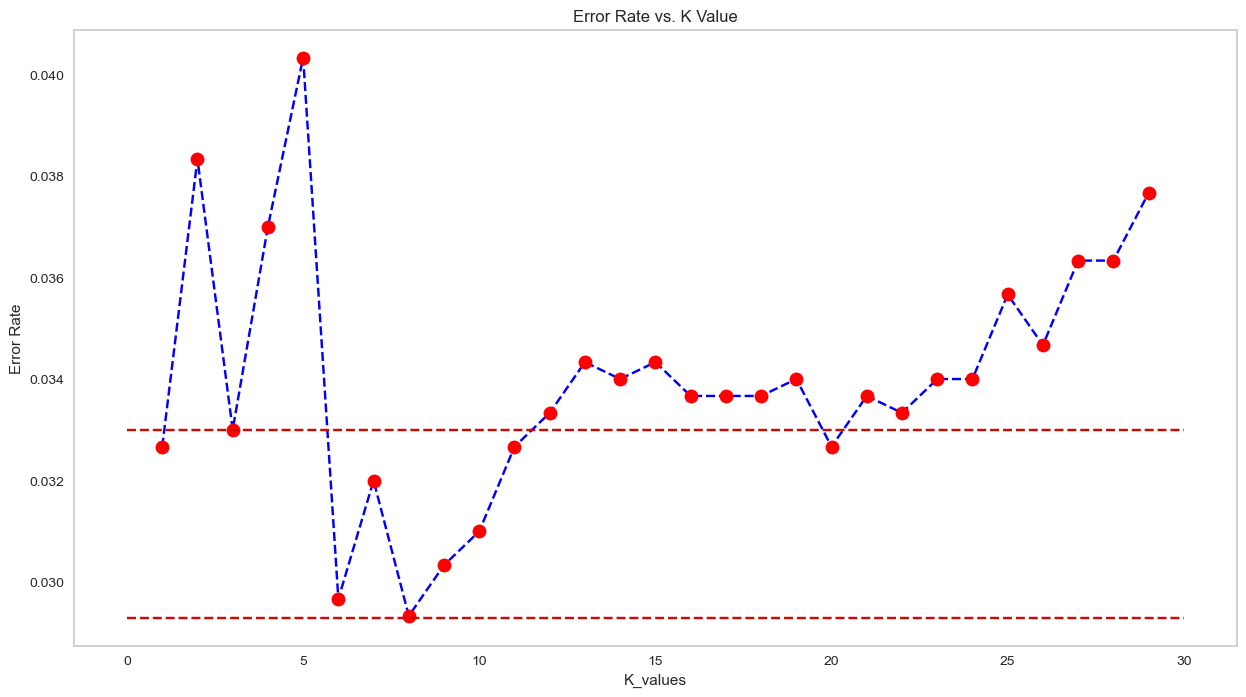

In [343]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.0293, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.033, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [225]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    op_KNN = [('scaler', scaler), ("KNN", KNeighborsClassifier(n_neighbors=k))]   
    pipe_knn_model = Pipeline(steps=op_KNN) 
    pipe_knn_model.fit(X_train,y_train) 
   
    y_pred_test = pipe_knn_model.predict(X_test)
    y_pred_train = pipe_knn_model.predict(X_train)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

Text(0, 0.5, 'Error Rate')

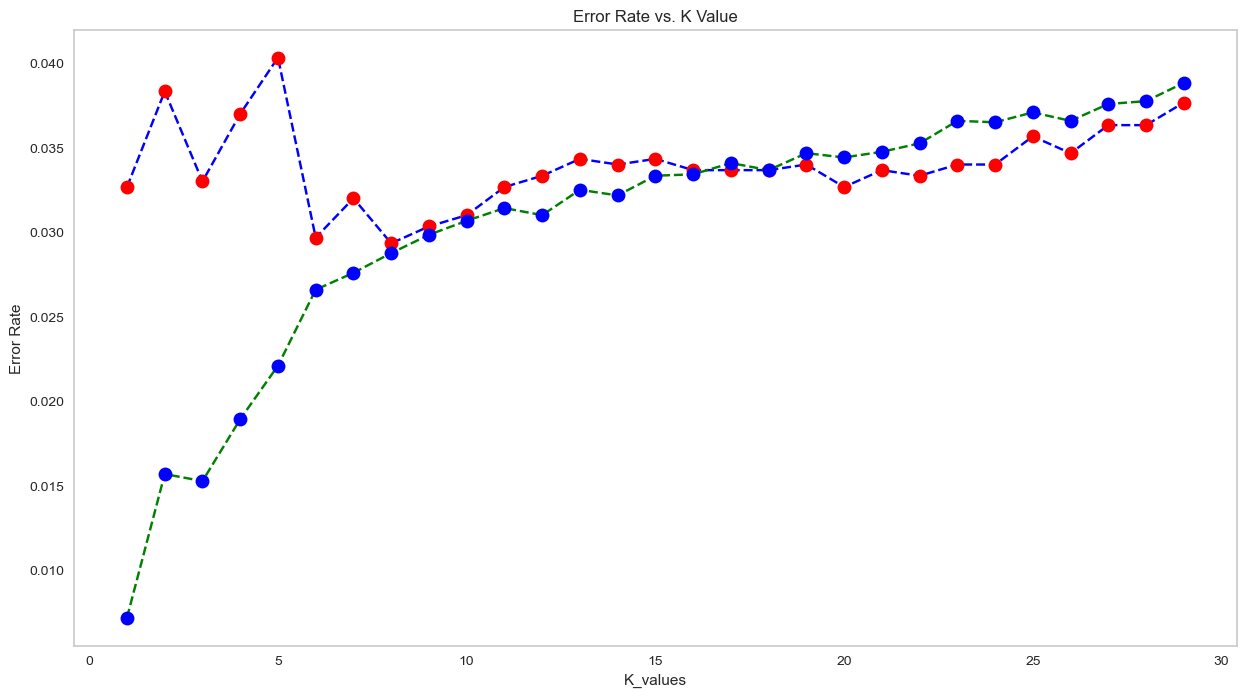

In [344]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

### n_neighbors = 5

In [345]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=5
KNN_model = [('scaler', scaler), ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))]

pipe_knn_model = Pipeline(steps=KNN_model)

In [346]:
pipe_knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [347]:
eval_metric(pipe_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2223   63]
 [  58  656]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2286
           1       0.91      0.92      0.92       714

    accuracy                           0.96      3000
   macro avg       0.94      0.95      0.94      3000
weighted avg       0.96      0.96      0.96      3000


Train_Set
[[9014  128]
 [ 137 2720]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9142
           1       0.96      0.95      0.95      2857

    accuracy                           0.98     11999
   macro avg       0.97      0.97      0.97     11999
weighted avg       0.98      0.98      0.98     11999



### Cross Validation

In [251]:
model = Pipeline(steps=KNN_model)

scores = cross_validate(model, X_train, y_train, scoring=["accuracy", "f1", "recall", "precision"], cv = 5, return_train_score=True)
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy   test_f1  train_f1  \
0  0.036980    0.336791       0.970417        0.972289  0.936323  0.940009   
1  0.060963    0.442729       0.962083        0.973747  0.918092  0.943243   
2  0.045974    0.303813       0.973333        0.971351  0.941712  0.938105   
3  0.031976    0.251846       0.972917        0.972289  0.941389  0.940171   
4  0.028981    0.222863       0.967070        0.971979  0.929401  0.939373   

   test_recall  train_recall  test_precision  train_precision  
0     0.912587      0.912035        0.961326         0.969753  
1     0.891608      0.916411        0.946197         0.971694  
2     0.905429      0.911636        0.981025         0.966157  
3     0.914186      0.914261        0.970260         0.967593  
4     0.910683      0.911636        0.948905         0.968852

test_accuracy      0.969164
train_accuracy     0.972331
test_f1            0.933383
train_f1           0.940180
test_recall        0.906899
train_recall       0.913196
test_precision     0.961543
train_precision    0.968810
dtype: float64

#### Prediction

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.93      0.94      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9142
           1       0.96      0.97      0.97      2857

    accuracy                           0.98     11999
   macro avg       0.98      0.98      0.98     11999
weighted avg       0.98      0.98      0.98     11999



accuracy_test   f1_test  recall_test  precision_test  \
KNN Model          0.967  0.931106     0.936975        0.925311   

           accuracy_train  f1_train  recall_train  precision_train  
KNN Model        0.984749  0.968091      0.971649         0.964559

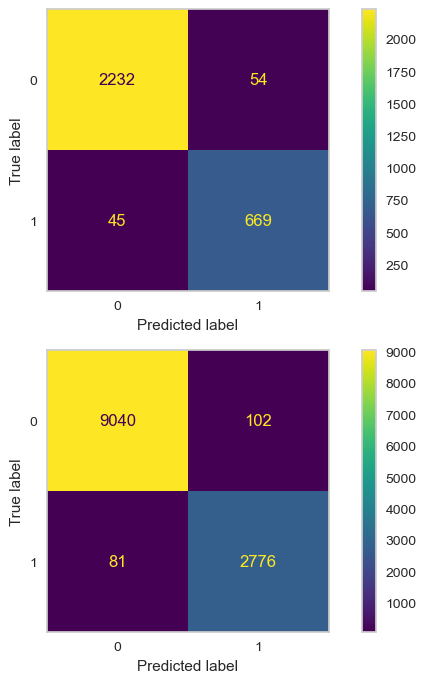

In [355]:
out_score_rf = eval_metric_classification(
    pipe_knn_model, X_train, y_train, X_test, y_test, 
    'KNN Model', average=None, labels=[1]
)
out_score_rf

# n_neighbors=3'e göre...

## Random Forest Classifier

#### Model Building

In [258]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

operations_rf = [("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42))]

pipe_rf_model = Pipeline(steps=operations_rf)

In [259]:
pipe_rf_model.fit(X_train, y_train)

Pipeline(steps=[('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [260]:
eval_metric(pipe_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[2269   17]
 [  24  690]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.97      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


Train_Set
[[9115   27]
 [   1 2856]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       0.99      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



### Cross Validation

In [263]:
model = Pipeline(steps=operations_rf)

scoring = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
0  1.021374    0.095941       0.985417        0.998229        0.965338   
1  1.094329    0.077953       0.980000        0.998021        0.969534   
2  0.858472    0.078950       0.987083        0.997396        0.990909   
3  0.927428    0.066959       0.989167        0.997604        0.982301   
4  0.783520    0.065957       0.983743        0.997917        0.976703   

   train_precision  test_recall  train_recall   test_f1  train_f1  
0         0.993043     0.973776      0.999562  0.969539  0.996292  
1         0.992609     0.945804      0.999125  0.957522  0.995856  
2         0.990030     0.954466      0.999125  0.972346  0.994557  
3         0.990889     0.971979      0.999125  0.977113  0.994990  
4         0.991753     0.954466      0.999563  0.965456  0.995643

test_accuracy      0.985082
train_accuracy     0.997833
test_precision     0.976957
train_precision    0.991665
test_recall        0.960098
train_recall       0.999300
test_f1            0.968395
train_f1           0.995468
dtype: float64

### GridSearchCV

In [264]:
# reset the model
operations_rf = [("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42))]

model = Pipeline(steps=operations_rf)

# define grid parameters
param_grid = {
            "RF_model__n_estimators":[10,50],  # np.arange(50,250,50)
            "RF_model__criterion":["entropy","gini"],
            "RF_model__max_features":['auto',"log2"],
            "RF_model__max_depth": [2,3,5,10],
            "RF_model__min_samples_split": [2, 5],
            "RF_model__min_samples_leaf" : [1, 5]}

# built RF grid model
grid_rf_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring="recall",
                          cv=5,
                          n_jobs = -1)

In [265]:
grid_rf_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['entropy', 'gini'],
                         'RF_model__max_depth': [2, 3, 5, 10],
                         'RF_model__max_features': ['auto', 'log2'],
                         'RF_model__min_samples_leaf': [1, 5],
                         'RF_model__min_samples_split': [2, 5],
                         'RF_model__n_estimators': [10, 50]},
             scoring='recall')

In [275]:
grid_rf_model.best_score_

0.9499510122102066

In [266]:
grid_rf_model.best_params_

{'RF_model__criterion': 'entropy',
 'RF_model__max_depth': 2,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 10}

In [268]:
grid_rf_model.best_estimator_

Pipeline(steps=[('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=2,
                                        n_estimators=10, random_state=42))])

In [269]:
eval_metric(grid_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[1901  385]
 [  36  678]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2286
           1       0.64      0.95      0.76       714

    accuracy                           0.86      3000
   macro avg       0.81      0.89      0.83      3000
weighted avg       0.90      0.86      0.87      3000


Train_Set
[[7625 1517]
 [ 134 2723]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      9142
           1       0.64      0.95      0.77      2857

    accuracy                           0.86     11999
   macro avg       0.81      0.89      0.83     11999
weighted avg       0.90      0.86      0.87     11999



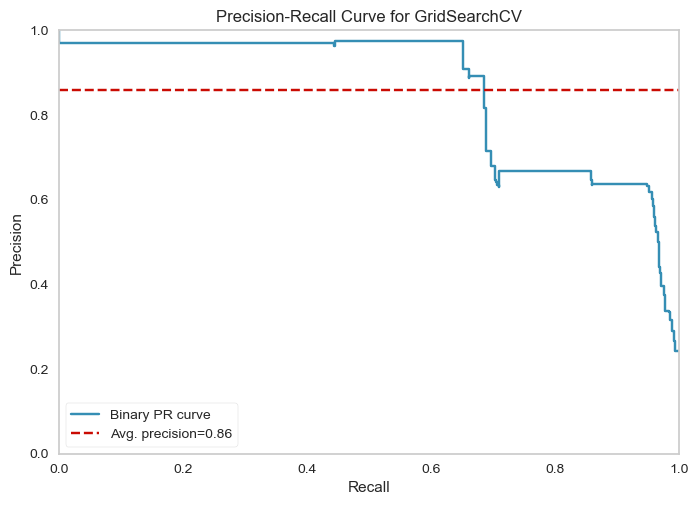

In [274]:
# precision-recall curve for RF grid model

from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    estimator=grid_rf_model,
    classes=grid_rf_model.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();
# for class 1

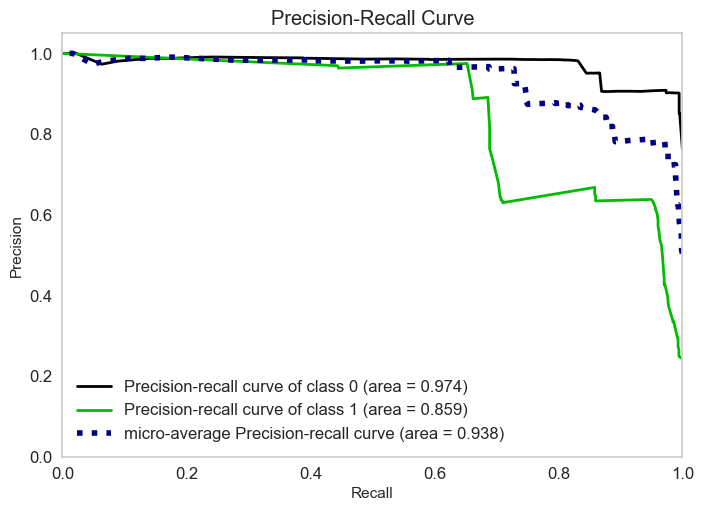

In [276]:
!pip install scikit-plot -q
import scikitplot as skplt
from scikitplot.metrics import plot_precision_recall

y_probas = grid_rf_model.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

#### Prediction

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2286
           1       0.64      0.95      0.76       714

    accuracy                           0.86      3000
   macro avg       0.81      0.89      0.83      3000
weighted avg       0.90      0.86      0.87      3000


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      9142
           1       0.64      0.95      0.77      2857

    accuracy                           0.86     11999
   macro avg       0.81      0.89      0.83     11999
weighted avg       0.90      0.86      0.87     11999



accuracy_test   f1_test  recall_test  precision_test  \
Random Forest       0.859667  0.763084      0.94958        0.637817   

               accuracy_train  f1_train  recall_train  precision_train  
Random Forest        0.862405  0.767366      0.953098         0.642217

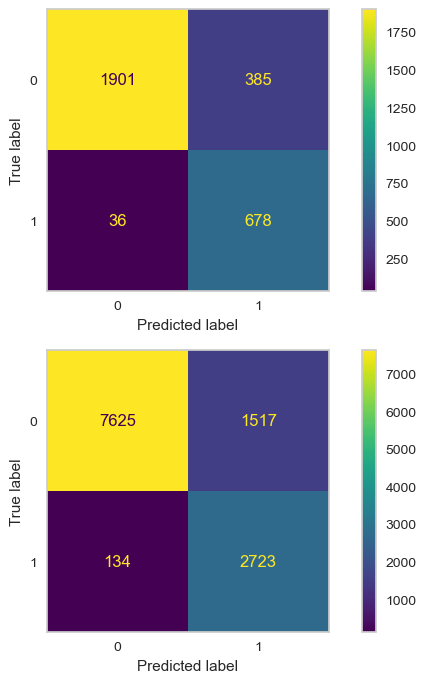

In [277]:
out_score_rf = eval_metric_classification(
    grid_rf_model, X_train, y_train, X_test, y_test, 
    'Random Forest', average=None, labels=[1]
)
out_score_rf

## XGBoost Classifier

#### Model Building

In [93]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights 

array([0.65625684, 2.09993   , 2.09993   , ..., 2.09993   , 0.65625684,
       2.09993   ])

In [94]:
from xgboost import XGBClassifier

In [95]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score,\
                            roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [96]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [97]:
xgb = XGBClassifier(max_depth = 3)
xgb.fit(X_train, y_train)

[16:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
xgb = XGBClassifier(max_depth=3)
xgb.fit(X_train, y_train, eval_metric="logloss")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[2259   27]
 [  46  668]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.96      0.94      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000


Train_Set
[[9087   55]
 [ 174 2683]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9142
           1       0.98      0.94      0.96      2857

    accuracy                           0.98     11999
   macro avg       0.98      0.97      0.97     11999
weighted avg       0.98      0.98      0.98     11999



### Cross Validation

In [100]:
model = XGBClassifier(max_depth=3, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                            'f1', 'roc_auc'], cv = 10, return_train_score=True,
                                                             fit_params={"eval_metric":"logloss"})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.978165
train_accuracy     0.981350
test_precision     0.974173
train_precision    0.980847
test_recall        0.933139
train_recall       0.940030
test_f1            0.953166
train_f1           0.960003
test_roc_auc       0.991099
train_roc_auc      0.995545
dtype: float64

### Grid Search

In [102]:
import xgboost as xgb

xgb.__version__

'1.3.3'

In [185]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [186]:
xgb_model = XGBClassifier(random_state=42)

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "recall", verbose=2, n_jobs = -1, 
                        return_train_score=True)

xgb_grid.fit(X_train, y_train, eval_metric="logloss")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=

In [189]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [190]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [191]:
xgb_grid.best_index_

106

In [192]:
pd.DataFrame(xgb_grid.cv_results_).loc[55, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.920201
mean_train_score    0.921246
Name: 55, dtype: object

In [193]:
xgb_grid.best_score_

0.940152229556783

In [194]:
y_pred = xgb_grid.predict(X_test)
y_pred_proba = xgb_grid.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[2272   14]
 [  43  671]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.98      0.94      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


Train_Set
[[9101   41]
 [  80 2777]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9142
           1       0.99      0.97      0.98      2857

    accuracy                           0.99     11999
   macro avg       0.99      0.98      0.99     11999
weighted avg       0.99      0.99      0.99     11999



### Feature Importance

In [195]:
model = XGBClassifier(n_estimators= 200, colsample_bytree = 1, subsample= 0.8, learning_rate = 0.2,
                      max_depth= 5, min_child_weight=1)
model.fit(X_train, y_train, eval_metric="logloss")

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending=False)
xgb_imp_feats

xgb_importance
lengthofservice        0.329640
satisfaction           0.295030
projects               0.204867
evaluation             0.112937
promotion              0.057525

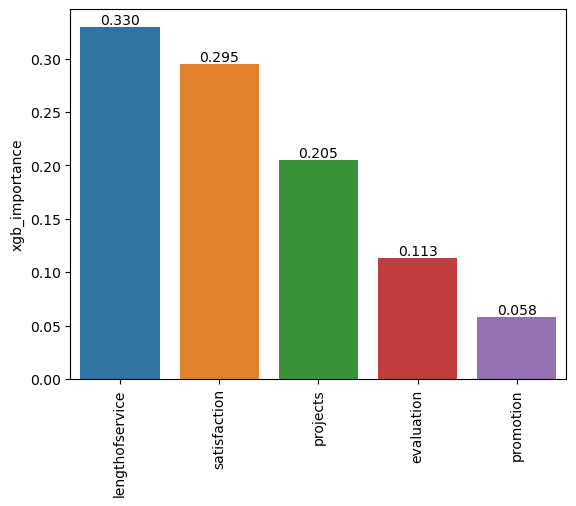

In [196]:
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

#### Evaluating Model Performance and Tuning

In [197]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[2272   14]
 [  43  671]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.98      0.94      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


Train_Set
[[9101   41]
 [  80 2777]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9142
           1       0.99      0.97      0.98      2857

    accuracy                           0.99     11999
   macro avg       0.99      0.98      0.99     11999
weighted avg       0.99      0.99      0.99     11999



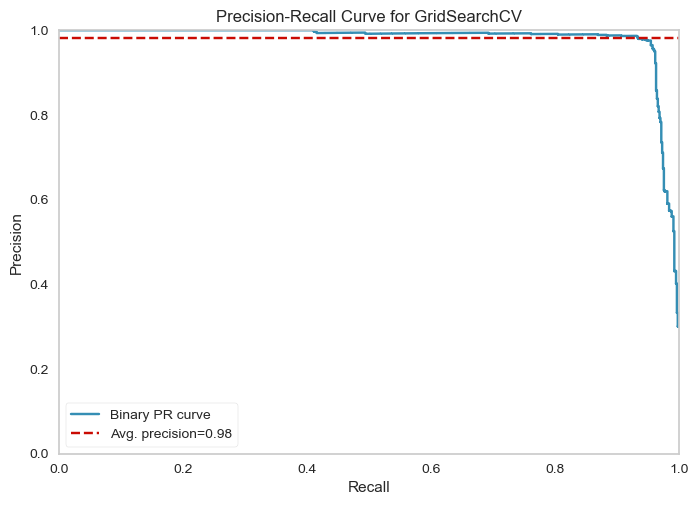

In [198]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    estimator=xgb_grid,
    classes=xgb_grid.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
viz.show();

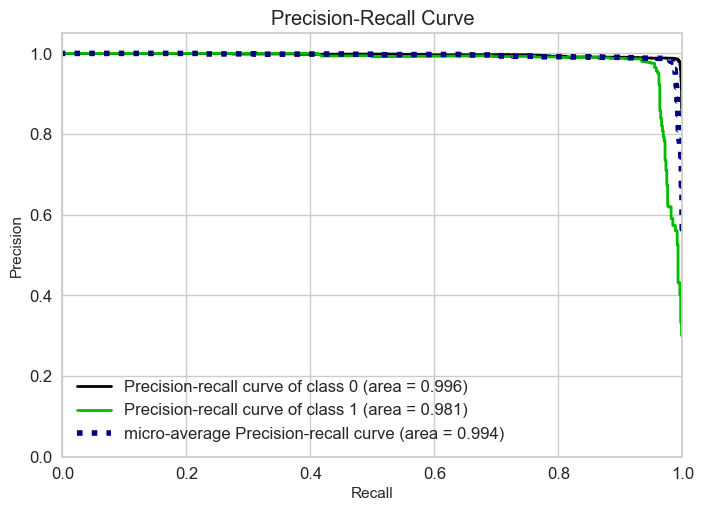

In [199]:
!pip install scikit-plot -q
import scikitplot as skplt
from scikitplot.metrics import plot_precision_recall

y_probas = xgb_grid.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

#### Prediction

In [200]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix, confusion_matrix

def eval_metric_classification(model, X_train, y_train, X_test, y_test, model_name='', ml_model=True, average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    # The style parameters control properties like the color of the background and whether a grid is enabled by default.
    sns.set_style("whitegrid", {'axes.grid' : False})
    if ml_model:
      y_pred_test = model.predict(X_test)
      y_pred_train = model.predict(X_train)
    else:
      y_pred_test = model.predict(X_test) >= 0.5
      y_pred_train = model.predict(X_train) >= 0.5
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    fig, ax = plt.subplots(2, 1, figsize=(7, 7))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[0]);
    print("\n"*1, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[1]);
    plt.tight_layout()
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :np.array(f1_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'recall_test'   :np.array(recall_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'precision_test':np.array(precision_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :np.array(f1_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],        
        'recall_train'   :np.array(recall_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
        'precision_train':np.array(precision_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
    }, orient='index', columns=[model_name]).T

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.98      0.94      0.96       714

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9142
           1       0.99      0.97      0.98      2857

    accuracy                           0.99     11999
   macro avg       0.99      0.98      0.99     11999
weighted avg       0.99      0.99      0.99     11999



accuracy_test   f1_test  recall_test  precision_test  accuracy_train  \
XGBoost          0.981  0.959257     0.939776        0.979562        0.989916   

         f1_train  recall_train  precision_train  
XGBoost  0.978678      0.971999         0.985451

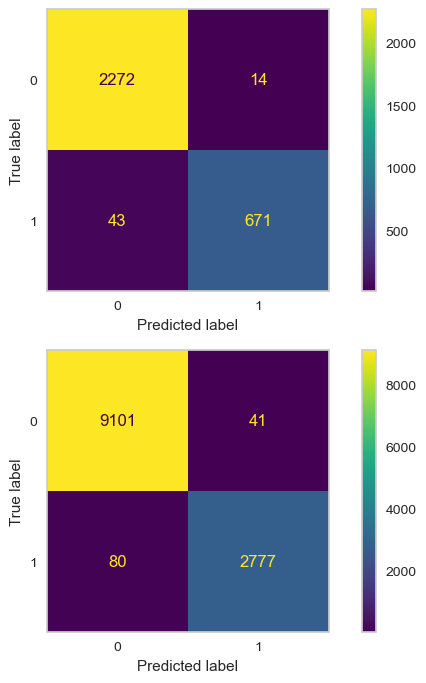

In [201]:
out_score_xgb = eval_metric_classification(
    xgb_grid, X_train, y_train, X_test, y_test, 
    'XGBoost', average=None, labels=[1]
)
out_score_xgb

## ANN Classifier

In [120]:
df_copy['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [121]:
X.shape

(14999, 11)

In [122]:
X.head()

satisfaction  evaluation  projects  hours  lengthofservice  accident  \
0          0.38        0.53         2    157                3         0   
1          0.80        0.86         5    262                6         0   
2          0.11        0.88         7    272                4         0   
3          0.72        0.87         5    223                5         0   
4          0.37        0.52         2    159                3         0   

   promotion  department  salary_high  salary_low  salary_medium  
0          0         7.0            0           1              0  
1          0         7.0            0           0              1  
2          0         7.0            0           0              1  
3          0         7.0            0           1              0  
4          0         7.0            0           1              0

In [123]:
y.shape

(14999,)

## Birinci Model

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20)

In [125]:
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [285]:
model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.0015)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [286]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6562568365784293, 1: 2.099929996499825}

In [287]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=150,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
72/72 [==============================] - 4s 10ms/step - loss: 0.6780 - recall: 0.3549 - val_loss: 0.6540 - val_recall: 0.5743
Epoch 2/200
72/72 [==============================] - 0s 4ms/step - loss: 0.6105 - recall: 0.7614 - val_loss: 0.5447 - val_recall: 0.8007
Epoch 3/200
72/72 [==============================] - 0s 4ms/step - loss: 0.4950 - recall: 0.8516 - val_loss: 0.4503 - val_recall: 0.8243
Epoch 4/200
72/72 [==============================] - 0s 4ms/step - loss: 0.4058 - recall: 0.8938 - val_loss: 0.4107 - val_recall: 0.9561
Epoch 5/200
72/72 [==============================] - 0s 4ms/step - loss: 0.3615 - recall: 0.9364 - val_loss: 0.3550 - val_recall: 0.8750
Epoch 6/200
72/72 [==============================] - 0s 4ms/step - loss: 0.3382 - recall: 0.9383 - val_loss: 0.3695 - val_recall: 0.9595
Epoch 7/200
72/72 [==============================] - 0s 4ms/step - loss: 0.3122 - recall: 0.9360 - val_loss: 0.3154 - val_recall: 0.9527
Epoch 8/200
72/72 [=====================

72/72 [==============================] - 0s 4ms/step - loss: 0.1684 - recall: 0.9176 - val_loss: 0.1863 - val_recall: 0.9324
Epoch 120/200
72/72 [==============================] - 0s 5ms/step - loss: 0.1653 - recall: 0.9153 - val_loss: 0.1842 - val_recall: 0.9358
Epoch 121/200
72/72 [==============================] - 0s 4ms/step - loss: 0.1662 - recall: 0.9172 - val_loss: 0.1558 - val_recall: 0.9291
Epoch 122/200
72/72 [==============================] - 0s 4ms/step - loss: 0.1656 - recall: 0.9180 - val_loss: 0.1655 - val_recall: 0.9324
Epoch 123/200
72/72 [==============================] - 0s 4ms/step - loss: 0.1643 - recall: 0.9153 - val_loss: 0.1699 - val_recall: 0.9324
Epoch 124/200
72/72 [==============================] - 0s 5ms/step - loss: 0.1653 - recall: 0.9160 - val_loss: 0.1765 - val_recall: 0.9324
Epoch 125/200
72/72 [==============================] - 0s 4ms/step - loss: 0.1638 - recall: 0.9176 - val_loss: 0.1683 - val_recall: 0.9324
Epoch 126/200
72/72 [====================

72/72 [==============================] - 0s 4ms/step - loss: 0.1567 - recall: 0.9157 - val_loss: 0.1650 - val_recall: 0.9291
Epoch 179/200
72/72 [==============================] - 0s 5ms/step - loss: 0.1572 - recall: 0.9160 - val_loss: 0.1470 - val_recall: 0.9257
Epoch 180/200
72/72 [==============================] - 0s 5ms/step - loss: 0.1596 - recall: 0.9141 - val_loss: 0.1516 - val_recall: 0.9291
Epoch 181/200
72/72 [==============================] - 0s 4ms/step - loss: 0.1556 - recall: 0.9172 - val_loss: 0.1522 - val_recall: 0.9223
Epoch 182/200
72/72 [==============================] - 0s 4ms/step - loss: 0.1604 - recall: 0.9129 - val_loss: 0.1528 - val_recall: 0.9257
Epoch 183/200
72/72 [==============================] - 0s 4ms/step - loss: 0.1558 - recall: 0.9141 - val_loss: 0.1519 - val_recall: 0.9291
Epoch 184/200
72/72 [==============================] - 0s 5ms/step - loss: 0.1569 - recall: 0.9157 - val_loss: 0.1397 - val_recall: 0.9257
Epoch 185/200
72/72 [====================

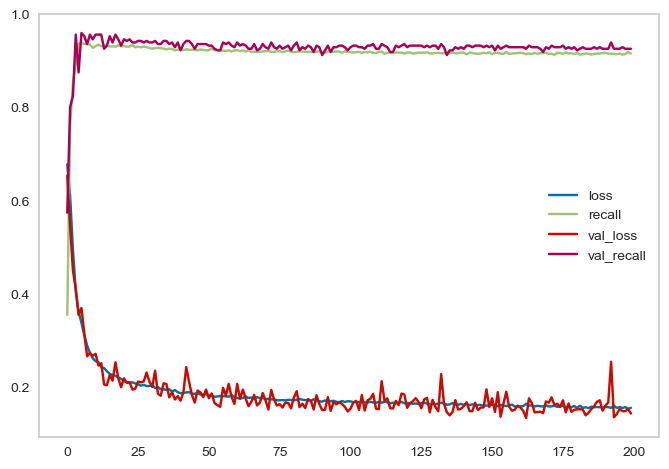

In [288]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [291]:
y_train_pred = model.predict(X_train)>0.5
y_pred = model.predict(X_test)>0.5
    
print("Test_Set")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print()
print("Train_Set")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

94/94 [==============================] - 0s 2ms/step
Test_Set
[[2239   47]
 [  62  652]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2286
           1       0.93      0.91      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000


Train_Set
[[8941  201]
 [ 242 2615]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9142
           1       0.93      0.92      0.92      2857

    accuracy                           0.96     11999
   macro avg       0.95      0.95      0.95     11999
weighted avg       0.96      0.96      0.96     11999



### İkinci Model (Learning Rate 0.002 yapıldı)

In [297]:
model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(20, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [298]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6562568365784293, 1: 2.099929996499825}

In [299]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=150,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
72/72 [==============================] - 4s 10ms/step - loss: 0.6706 - recall: 0.3444 - val_loss: 0.5851 - val_recall: 0.9459
Epoch 2/200
72/72 [==============================] - 0s 4ms/step - loss: 0.4697 - recall: 0.9196 - val_loss: 0.4045 - val_recall: 0.9527
Epoch 3/200
72/72 [==============================] - 0s 5ms/step - loss: 0.3493 - recall: 0.9449 - val_loss: 0.3088 - val_recall: 0.9426
Epoch 4/200
72/72 [==============================] - 0s 4ms/step - loss: 0.3064 - recall: 0.9371 - val_loss: 0.2592 - val_recall: 0.9459
Epoch 5/200
72/72 [==============================] - 0s 4ms/step - loss: 0.2850 - recall: 0.9434 - val_loss: 0.2652 - val_recall: 0.9561
Epoch 6/200
72/72 [==============================] - 0s 4ms/step - loss: 0.2697 - recall: 0.9438 - val_loss: 0.2697 - val_recall: 0.9527
Epoch 7/200
72/72 [==============================] - 0s 5ms/step - loss: 0.2643 - recall: 0.9449 - val_loss: 0.2465 - val_recall: 0.9527
Epoch 8/200
72/72 [=====================

72/72 [==============================] - 0s 4ms/step - loss: 0.1564 - recall: 0.9192 - val_loss: 0.1412 - val_recall: 0.9257
Epoch 120/200
72/72 [==============================] - 0s 4ms/step - loss: 0.1590 - recall: 0.9184 - val_loss: 0.1471 - val_recall: 0.9324
Epoch 121/200
72/72 [==============================] - 0s 5ms/step - loss: 0.1562 - recall: 0.9188 - val_loss: 0.1387 - val_recall: 0.9257
Epoch 122/200
72/72 [==============================] - 0s 6ms/step - loss: 0.1532 - recall: 0.9207 - val_loss: 0.1338 - val_recall: 0.9020
Epoch 123/200
72/72 [==============================] - 0s 5ms/step - loss: 0.1537 - recall: 0.9207 - val_loss: 0.1340 - val_recall: 0.9189
Epoch 124/200
72/72 [==============================] - 0s 6ms/step - loss: 0.1491 - recall: 0.9207 - val_loss: 0.1439 - val_recall: 0.9291
Epoch 125/200
72/72 [==============================] - 0s 5ms/step - loss: 0.1526 - recall: 0.9196 - val_loss: 0.1517 - val_recall: 0.9324
Epoch 126/200
72/72 [====================

72/72 [==============================] - 0s 7ms/step - loss: 0.1461 - recall: 0.9196 - val_loss: 0.1376 - val_recall: 0.9358
Epoch 179/200
72/72 [==============================] - 0s 6ms/step - loss: 0.1436 - recall: 0.9215 - val_loss: 0.1244 - val_recall: 0.9257
Epoch 180/200
72/72 [==============================] - 0s 6ms/step - loss: 0.1501 - recall: 0.9188 - val_loss: 0.1676 - val_recall: 0.9358
Epoch 181/200
72/72 [==============================] - 0s 7ms/step - loss: 0.1472 - recall: 0.9203 - val_loss: 0.1206 - val_recall: 0.9257
Epoch 182/200
72/72 [==============================] - 0s 7ms/step - loss: 0.1442 - recall: 0.9203 - val_loss: 0.1596 - val_recall: 0.9291
Epoch 183/200
72/72 [==============================] - 1s 7ms/step - loss: 0.1439 - recall: 0.9215 - val_loss: 0.1570 - val_recall: 0.9291
Epoch 184/200
72/72 [==============================] - 0s 5ms/step - loss: 0.1479 - recall: 0.9196 - val_loss: 0.1831 - val_recall: 0.9324
Epoch 185/200
72/72 [====================

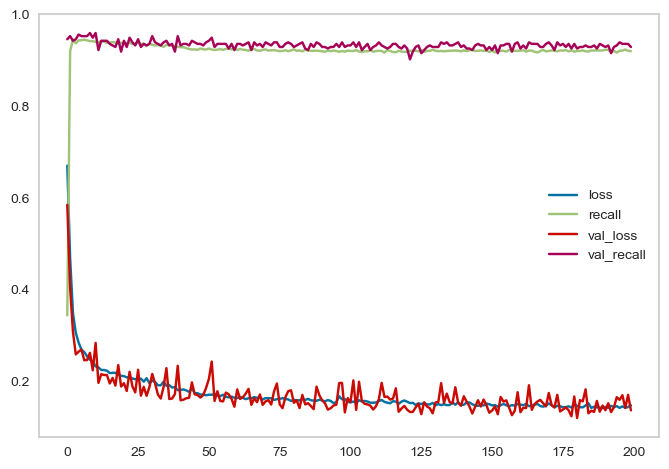

In [300]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [301]:
y_train_pred = model.predict(X_train)>0.5
y_pred = model.predict(X_test)>0.5
    
print("Test_Set")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print()
print("Train_Set")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

94/94 [==============================] - 0s 2ms/step
Test_Set
[[2241   45]
 [  60  654]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2286
           1       0.94      0.92      0.93       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000


Train_Set
[[8956  186]
 [ 231 2626]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9142
           1       0.93      0.92      0.93      2857

    accuracy                           0.97     11999
   macro avg       0.95      0.95      0.95     11999
weighted avg       0.97      0.97      0.97     11999



### Üçüncü Model (Dropout Ekliyoruz)

In [302]:
model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(20, activation = "relu"))
# model.add(Dropout(0.1))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.0025)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [303]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6562568365784293, 1: 2.099929996499825}

In [304]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=150,
          epochs=250,
          verbose=1,
          class_weight=class_weights)

Epoch 1/250
72/72 [==============================] - 4s 10ms/step - loss: 0.5955 - recall: 0.8032 - val_loss: 0.4289 - val_recall: 0.9595
Epoch 2/250
72/72 [==============================] - 0s 5ms/step - loss: 0.3920 - recall: 0.9297 - val_loss: 0.3638 - val_recall: 0.9561
Epoch 3/250
72/72 [==============================] - 0s 5ms/step - loss: 0.3328 - recall: 0.9332 - val_loss: 0.2971 - val_recall: 0.9358
Epoch 4/250
72/72 [==============================] - 0s 5ms/step - loss: 0.3106 - recall: 0.9289 - val_loss: 0.2820 - val_recall: 0.9358
Epoch 5/250
72/72 [==============================] - 0s 5ms/step - loss: 0.3062 - recall: 0.9207 - val_loss: 0.2703 - val_recall: 0.9459
Epoch 6/250
72/72 [==============================] - 0s 5ms/step - loss: 0.2888 - recall: 0.9293 - val_loss: 0.2758 - val_recall: 0.9459
Epoch 7/250
72/72 [==============================] - 0s 5ms/step - loss: 0.2798 - recall: 0.9239 - val_loss: 0.2316 - val_recall: 0.9122
Epoch 8/250
72/72 [=====================

72/72 [==============================] - 0s 4ms/step - loss: 0.1553 - recall: 0.9203 - val_loss: 0.1342 - val_recall: 0.9223
Epoch 120/250
72/72 [==============================] - 0s 5ms/step - loss: 0.1538 - recall: 0.9184 - val_loss: 0.1510 - val_recall: 0.9291
Epoch 121/250
72/72 [==============================] - 0s 5ms/step - loss: 0.1511 - recall: 0.9176 - val_loss: 0.1434 - val_recall: 0.9223
Epoch 122/250
72/72 [==============================] - 0s 5ms/step - loss: 0.1561 - recall: 0.9164 - val_loss: 0.1277 - val_recall: 0.9189
Epoch 123/250
72/72 [==============================] - 0s 5ms/step - loss: 0.1521 - recall: 0.9176 - val_loss: 0.1380 - val_recall: 0.9291
Epoch 124/250
72/72 [==============================] - 0s 5ms/step - loss: 0.1471 - recall: 0.9172 - val_loss: 0.1371 - val_recall: 0.9223
Epoch 125/250
72/72 [==============================] - 0s 5ms/step - loss: 0.1509 - recall: 0.9203 - val_loss: 0.1484 - val_recall: 0.9257
Epoch 126/250
72/72 [====================

72/72 [==============================] - 0s 6ms/step - loss: 0.1406 - recall: 0.9196 - val_loss: 0.1318 - val_recall: 0.9223
Epoch 179/250
72/72 [==============================] - 0s 6ms/step - loss: 0.1422 - recall: 0.9203 - val_loss: 0.1254 - val_recall: 0.9324
Epoch 180/250
72/72 [==============================] - 0s 6ms/step - loss: 0.1480 - recall: 0.9219 - val_loss: 0.1361 - val_recall: 0.9257
Epoch 181/250
72/72 [==============================] - 0s 6ms/step - loss: 0.1461 - recall: 0.9203 - val_loss: 0.1508 - val_recall: 0.9291
Epoch 182/250
72/72 [==============================] - 0s 7ms/step - loss: 0.1436 - recall: 0.9215 - val_loss: 0.1291 - val_recall: 0.9223
Epoch 183/250
72/72 [==============================] - 0s 6ms/step - loss: 0.1419 - recall: 0.9196 - val_loss: 0.1396 - val_recall: 0.9257
Epoch 184/250
72/72 [==============================] - 0s 6ms/step - loss: 0.1459 - recall: 0.9176 - val_loss: 0.1406 - val_recall: 0.9257
Epoch 185/250
72/72 [====================

72/72 [==============================] - 0s 5ms/step - loss: 0.1363 - recall: 0.9239 - val_loss: 0.1309 - val_recall: 0.9189
Epoch 238/250
72/72 [==============================] - 0s 5ms/step - loss: 0.1445 - recall: 0.9223 - val_loss: 0.1434 - val_recall: 0.9257
Epoch 239/250
72/72 [==============================] - 0s 5ms/step - loss: 0.1433 - recall: 0.9219 - val_loss: 0.1407 - val_recall: 0.9257
Epoch 240/250
72/72 [==============================] - 0s 6ms/step - loss: 0.1408 - recall: 0.9227 - val_loss: 0.1274 - val_recall: 0.9189
Epoch 241/250
72/72 [==============================] - 0s 6ms/step - loss: 0.1419 - recall: 0.9207 - val_loss: 0.1439 - val_recall: 0.9223
Epoch 242/250
72/72 [==============================] - 0s 6ms/step - loss: 0.1446 - recall: 0.9235 - val_loss: 0.1368 - val_recall: 0.9257
Epoch 243/250
72/72 [==============================] - 0s 5ms/step - loss: 0.1400 - recall: 0.9246 - val_loss: 0.1339 - val_recall: 0.8851
Epoch 244/250
72/72 [====================

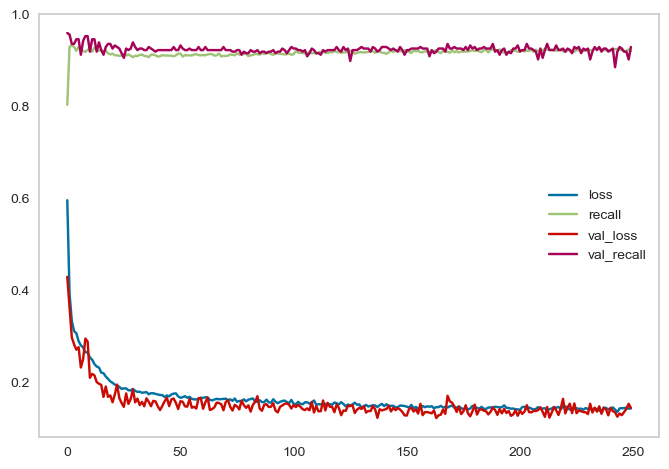

In [305]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [307]:
y_train_pred = model.predict(X_train)>0.5
y_pred = model.predict(X_test)>0.5
    
print("Test_Set")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print()
print("Train_Set")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

94/94 [==============================] - 0s 2ms/step
Test_Set
[[2243   43]
 [  59  655]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2286
           1       0.94      0.92      0.93       714

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000


Train_Set
[[8971  171]
 [ 211 2646]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9142
           1       0.94      0.93      0.93      2857

    accuracy                           0.97     11999
   macro avg       0.96      0.95      0.96     11999
weighted avg       0.97      0.97      0.97     11999



### Üçüncü Model (Early Stop Ekliyoruz)

In [356]:
model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(20, activation = "relu"))
# model.add(Dropout(0.1))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.0025)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [357]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6562568365784293, 1: 2.099929996499825}

In [358]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)

In [359]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=100,
          epochs=200,
          verbose=1,
          class_weight=class_weights,
         callbacks = [early_stop])

Epoch 1/200
108/108 [==============================] - 4s 8ms/step - loss: 0.6780 - recall: 0.5135 - val_loss: 0.5625 - val_recall: 0.7095
Epoch 2/200
108/108 [==============================] - 1s 5ms/step - loss: 0.5162 - recall: 0.7681 - val_loss: 0.3233 - val_recall: 0.9493
Epoch 3/200
108/108 [==============================] - 1s 5ms/step - loss: 0.4118 - recall: 0.8993 - val_loss: 0.3079 - val_recall: 0.9459
Epoch 4/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3730 - recall: 0.9153 - val_loss: 0.2912 - val_recall: 0.9561
Epoch 5/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3519 - recall: 0.9282 - val_loss: 0.2817 - val_recall: 0.8818
Epoch 6/200
108/108 [==============================] - 0s 5ms/step - loss: 0.3367 - recall: 0.9250 - val_loss: 0.2712 - val_recall: 0.9392
Epoch 7/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3227 - recall: 0.9258 - val_loss: 0.2826 - val_recall: 0.9324
Epoch 8/200
108/108 [======

108/108 [==============================] - 1s 5ms/step - loss: 0.1647 - recall: 0.9200 - val_loss: 0.1441 - val_recall: 0.9257
Epoch 60/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1647 - recall: 0.9188 - val_loss: 0.1671 - val_recall: 0.9257
Epoch 61/200
108/108 [==============================] - 0s 4ms/step - loss: 0.1620 - recall: 0.9184 - val_loss: 0.1381 - val_recall: 0.9291
Epoch 62/200
108/108 [==============================] - 0s 4ms/step - loss: 0.1659 - recall: 0.9160 - val_loss: 0.1559 - val_recall: 0.9257
Epoch 63/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1702 - recall: 0.9164 - val_loss: 0.1608 - val_recall: 0.9291
Epoch 64/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1639 - recall: 0.9196 - val_loss: 0.1520 - val_recall: 0.9257
Epoch 65/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1637 - recall: 0.9192 - val_loss: 0.1402 - val_recall: 0.9223
Epoch 66/200
108/108 [===========

108/108 [==============================] - 1s 6ms/step - loss: 0.1525 - recall: 0.9227 - val_loss: 0.1408 - val_recall: 0.9155
Epoch 118/200
108/108 [==============================] - 1s 6ms/step - loss: 0.1505 - recall: 0.9219 - val_loss: 0.1366 - val_recall: 0.9223
Epoch 119/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1533 - recall: 0.9203 - val_loss: 0.1449 - val_recall: 0.9291
Epoch 120/200
108/108 [==============================] - 1s 6ms/step - loss: 0.1501 - recall: 0.9258 - val_loss: 0.1591 - val_recall: 0.9189
Epoch 121/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1516 - recall: 0.9266 - val_loss: 0.1408 - val_recall: 0.9291
Epoch 122/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1571 - recall: 0.9227 - val_loss: 0.1522 - val_recall: 0.9223
Epoch 123/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1528 - recall: 0.9242 - val_loss: 0.1492 - val_recall: 0.9324
Epoch 124/200
108/108 [====

108/108 [==============================] - 1s 5ms/step - loss: 0.1451 - recall: 0.9227 - val_loss: 0.1674 - val_recall: 0.9291
Epoch 176/200
108/108 [==============================] - 0s 4ms/step - loss: 0.1535 - recall: 0.9219 - val_loss: 0.1345 - val_recall: 0.9189
Epoch 177/200
108/108 [==============================] - 1s 6ms/step - loss: 0.1524 - recall: 0.9239 - val_loss: 0.1524 - val_recall: 0.9223
Epoch 178/200
108/108 [==============================] - 0s 4ms/step - loss: 0.1519 - recall: 0.9254 - val_loss: 0.1443 - val_recall: 0.9189
Epoch 179/200
108/108 [==============================] - 0s 4ms/step - loss: 0.1438 - recall: 0.9274 - val_loss: 0.1464 - val_recall: 0.9257
Epoch 180/200
108/108 [==============================] - 0s 4ms/step - loss: 0.1491 - recall: 0.9297 - val_loss: 0.1409 - val_recall: 0.9257
Epoch 181/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1478 - recall: 0.9250 - val_loss: 0.1479 - val_recall: 0.9257
Epoch 182/200
108/108 [====

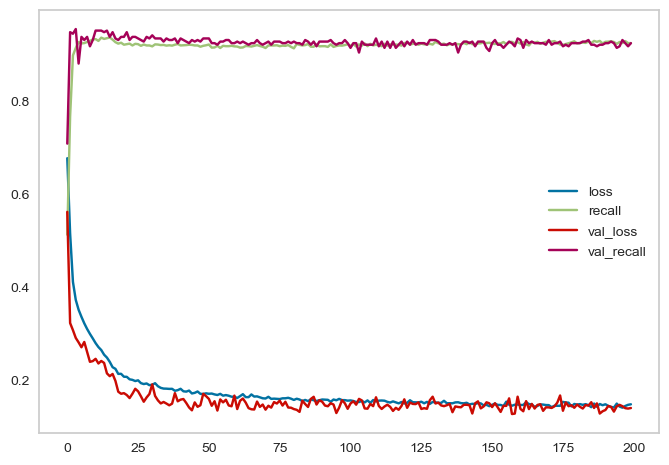

In [360]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [361]:
y_train_pred = model.predict(X_train)>0.5
y_pred = model.predict(X_test)>0.5
    
print("Test_Set")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print()
print("Train_Set")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

94/94 [==============================] - 0s 2ms/step
Test_Set
[[2225   61]
 [  55  659]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2286
           1       0.92      0.92      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000


Train_Set
[[8935  207]
 [ 210 2647]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9142
           1       0.93      0.93      0.93      2857

    accuracy                           0.97     11999
   macro avg       0.95      0.95      0.95     11999
weighted avg       0.97      0.97      0.97     11999



## Grid Search

In [362]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [364]:
def create_model(optimizer, learn_rate):
    model = Sequential()
    model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
    model.add(Dropout(0.15))
    model.add(Dense(20, activation = "relu"))
    # model.add(Dropout(0.1))
    model.add(Dense(10, activation = "relu"))
    model.add(Dense(5, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))
    model.compile(optimizer = optimizer(lr=learn_rate), loss = "binary_crossentropy", metrics = ["Recall"])
    return model
parameters = {'batch_size': [100,150,200],
              'optimizer': [Adam],
              'learn_rate': [0.0015,0.002,0.0025]}
model = KerasClassifier(build_fn=create_model, epochs=230, verbose=0)

grid = GridSearchCV(estimator=model, param_grid=parameters, cv=3, verbose=1)
grid_result = grid.fit(X_train, y_train, class_weight = class_weights)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


Best: nan using {'batch_size': 100, 'learn_rate': 0.0015, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>}


In [152]:
df_copy

satisfaction  evaluation  projects  hours  lengthofservice  accident  \
0              0.38        0.53         2    157                3         0   
1              0.80        0.86         5    262                6         0   
2              0.11        0.88         7    272                4         0   
3              0.72        0.87         5    223                5         0   
4              0.37        0.52         2    159                3         0   
...             ...         ...       ...    ...              ...       ...   
14994          0.40        0.57         2    151                3         0   
14995          0.37        0.48         2    160                3         0   
14996          0.37        0.53         2    143                3         0   
14997          0.11        0.96         6    280                4         0   
14998          0.37        0.52         2    158                3         0   

       promotion  department  left  salary_high  salary_low  salary_medium  
0              0         7.0     1            0           1              0  
1              0         7.0     1            0           0              1  
2              0         7.0     1            0           0              1  
3              0         7.0     1            0           1              0  
4              0         7.0     1            0           1              0  
...          ...         ...   ...          ...         ...            ...  
14994          0         8.0     1            0           1              0  
14995          0         8.0     1            0           1              0  
14996          0         8.0     1            0           1              0  
14997          0         8.0     1            0           1              0  
14998          0         8.0     1            0           1              0  

[14999 rows x 12 columns]

In [153]:
df_ann2 = df_copy[['satisfaction','evaluation','left']]
df_ann2

satisfaction  evaluation  left
0              0.38        0.53     1
1              0.80        0.86     1
2              0.11        0.88     1
3              0.72        0.87     1
4              0.37        0.52     1
...             ...         ...   ...
14994          0.40        0.57     1
14995          0.37        0.48     1
14996          0.37        0.53     1
14997          0.11        0.96     1
14998          0.37        0.52     1

[14999 rows x 3 columns]

In [154]:
df_ann3=df_copy[['satisfaction','evaluation','lengthofservice','left']]
df_ann3

satisfaction  evaluation  lengthofservice  left
0              0.38        0.53                3     1
1              0.80        0.86                6     1
2              0.11        0.88                4     1
3              0.72        0.87                5     1
4              0.37        0.52                3     1
...             ...         ...              ...   ...
14994          0.40        0.57                3     1
14995          0.37        0.48                3     1
14996          0.37        0.53                3     1
14997          0.11        0.96                4     1
14998          0.37        0.52                3     1

[14999 rows x 4 columns]

In [155]:
df_ann4=df_copy[['satisfaction','evaluation','lengthofservice','promotion','left']]
df_ann4

satisfaction  evaluation  lengthofservice  promotion  left
0              0.38        0.53                3          0     1
1              0.80        0.86                6          0     1
2              0.11        0.88                4          0     1
3              0.72        0.87                5          0     1
4              0.37        0.52                3          0     1
...             ...         ...              ...        ...   ...
14994          0.40        0.57                3          0     1
14995          0.37        0.48                3          0     1
14996          0.37        0.53                3          0     1
14997          0.11        0.96                4          0     1
14998          0.37        0.52                3          0     1

[14999 rows x 5 columns]

In [156]:
df_ann5=df_copy[['satisfaction','evaluation','lengthofservice','promotion','left', 'projects']]
df_ann5

satisfaction  evaluation  lengthofservice  promotion  left  projects
0              0.38        0.53                3          0     1         2
1              0.80        0.86                6          0     1         5
2              0.11        0.88                4          0     1         7
3              0.72        0.87                5          0     1         5
4              0.37        0.52                3          0     1         2
...             ...         ...              ...        ...   ...       ...
14994          0.40        0.57                3          0     1         2
14995          0.37        0.48                3          0     1         2
14996          0.37        0.53                3          0     1         2
14997          0.11        0.96                4          0     1         6
14998          0.37        0.52                3          0     1         2

[14999 rows x 6 columns]

## df_ann2 datasetiyle ann analiz

In [157]:
X = df_ann2.drop(columns='left', axis=1)
y = df_ann2['left']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20)

In [159]:
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(20, activation = "relu"))
# model.add(Dropout(0.1))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.0025)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [161]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6562568365784293, 1: 2.099929996499825}

In [162]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=100,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
108/108 [==============================] - 5s 12ms/step - loss: 0.6390 - recall: 0.5451 - val_loss: 0.5758 - val_recall: 0.7537
Epoch 2/200
108/108 [==============================] - 0s 4ms/step - loss: 0.5303 - recall: 0.7346 - val_loss: 0.5889 - val_recall: 0.7868
Epoch 3/200
108/108 [==============================] - 0s 4ms/step - loss: 0.4613 - recall: 0.7431 - val_loss: 0.4307 - val_recall: 0.7390
Epoch 4/200
108/108 [==============================] - 0s 4ms/step - loss: 0.4124 - recall: 0.8012 - val_loss: 0.3588 - val_recall: 0.8603
Epoch 5/200
108/108 [==============================] - 0s 4ms/step - loss: 0.3763 - recall: 0.8352 - val_loss: 0.3229 - val_recall: 0.8125
Epoch 6/200
108/108 [==============================] - 0s 4ms/step - loss: 0.3586 - recall: 0.8449 - val_loss: 0.3842 - val_recall: 0.9044
Epoch 7/200
108/108 [==============================] - 0s 4ms/step - loss: 0.3472 - recall: 0.8387 - val_loss: 0.3553 - val_recall: 0.9007
Epoch 8/200
108/108 [=====

108/108 [==============================] - 0s 4ms/step - loss: 0.2722 - recall: 0.8909 - val_loss: 0.3225 - val_recall: 0.9118
Epoch 118/200
108/108 [==============================] - 1s 5ms/step - loss: 0.2716 - recall: 0.8959 - val_loss: 0.2680 - val_recall: 0.8603
Epoch 119/200
108/108 [==============================] - 0s 4ms/step - loss: 0.2679 - recall: 0.8928 - val_loss: 0.2653 - val_recall: 0.9154
Epoch 120/200
108/108 [==============================] - 1s 7ms/step - loss: 0.2733 - recall: 0.8936 - val_loss: 0.3076 - val_recall: 0.9154
Epoch 121/200
108/108 [==============================] - 2s 16ms/step - loss: 0.2707 - recall: 0.8952 - val_loss: 0.2678 - val_recall: 0.8971
Epoch 122/200
108/108 [==============================] - 1s 13ms/step - loss: 0.2711 - recall: 0.8967 - val_loss: 0.2981 - val_recall: 0.8934
Epoch 123/200
108/108 [==============================] - 1s 5ms/step - loss: 0.2687 - recall: 0.8959 - val_loss: 0.2962 - val_recall: 0.9007
Epoch 124/200
108/108 [==

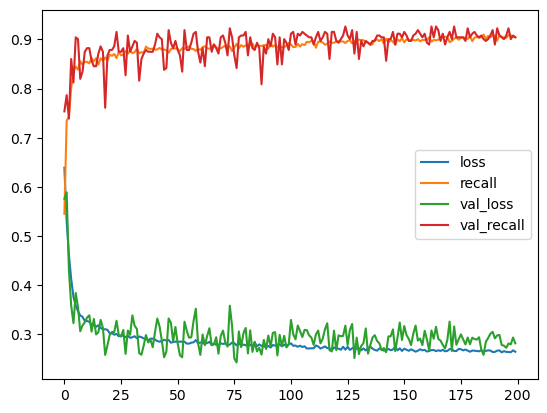

In [163]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [164]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[2003  283]
 [  64  650]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2286
           1       0.70      0.91      0.79       714

    accuracy                           0.88      3000
   macro avg       0.83      0.89      0.85      3000
weighted avg       0.90      0.88      0.89      3000



## df_ann3 datasetiyle ann analiz

In [165]:
X = df_ann3.drop(columns='left', axis=1)
y = df_ann3['left']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20)

In [167]:
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(20, activation = "relu"))
# model.add(Dropout(0.1))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.0025)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [169]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6562568365784293, 1: 2.099929996499825}

In [170]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=100,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
108/108 [==============================] - 4s 9ms/step - loss: 0.5932 - recall: 0.5049 - val_loss: 0.3549 - val_recall: 0.7740
Epoch 2/200
108/108 [==============================] - 1s 5ms/step - loss: 0.4366 - recall: 0.9119 - val_loss: 0.3207 - val_recall: 0.9521
Epoch 3/200
108/108 [==============================] - 0s 4ms/step - loss: 0.3885 - recall: 0.9314 - val_loss: 0.2781 - val_recall: 0.9349
Epoch 4/200
108/108 [==============================] - 0s 4ms/step - loss: 0.3633 - recall: 0.9298 - val_loss: 0.2707 - val_recall: 0.9452
Epoch 5/200
108/108 [==============================] - 0s 4ms/step - loss: 0.3392 - recall: 0.9368 - val_loss: 0.2561 - val_recall: 0.9418
Epoch 6/200
108/108 [==============================] - 0s 4ms/step - loss: 0.3240 - recall: 0.9361 - val_loss: 0.2303 - val_recall: 0.9315
Epoch 7/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3009 - recall: 0.9290 - val_loss: 0.2399 - val_recall: 0.9452
Epoch 8/200
108/108 [======

108/108 [==============================] - 1s 5ms/step - loss: 0.1562 - recall: 0.9193 - val_loss: 0.1553 - val_recall: 0.9349
Epoch 118/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1569 - recall: 0.9197 - val_loss: 0.1588 - val_recall: 0.9349
Epoch 119/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1602 - recall: 0.9189 - val_loss: 0.1520 - val_recall: 0.9315
Epoch 120/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1563 - recall: 0.9236 - val_loss: 0.1485 - val_recall: 0.9281
Epoch 121/200
108/108 [==============================] - 0s 4ms/step - loss: 0.1622 - recall: 0.9228 - val_loss: 0.1622 - val_recall: 0.9349
Epoch 122/200
108/108 [==============================] - 0s 4ms/step - loss: 0.1577 - recall: 0.9189 - val_loss: 0.1463 - val_recall: 0.9349
Epoch 123/200
108/108 [==============================] - 0s 4ms/step - loss: 0.1593 - recall: 0.9212 - val_loss: 0.1439 - val_recall: 0.9315
Epoch 124/200
108/108 [====

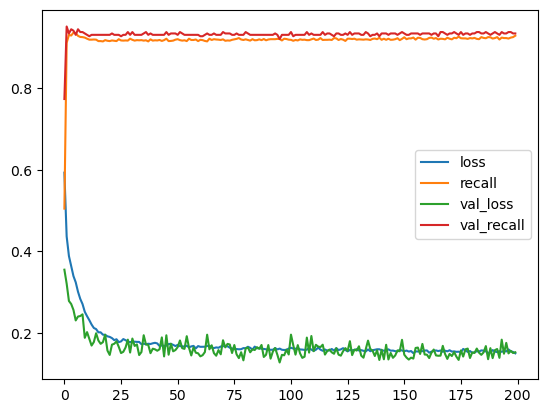

In [171]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [172]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[2219   67]
 [  56  658]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2286
           1       0.91      0.92      0.91       714

    accuracy                           0.96      3000
   macro avg       0.94      0.95      0.94      3000
weighted avg       0.96      0.96      0.96      3000



## df_ann4 datasetiyle ann analiz

In [173]:
X = df_ann4.drop(columns='left', axis=1)
y = df_ann4['left']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20)

In [175]:
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(20, activation = "relu"))
# model.add(Dropout(0.1))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.0025)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [177]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6562568365784293, 1: 2.099929996499825}

In [178]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=100,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
108/108 [==============================] - 5s 13ms/step - loss: 0.5819 - recall: 0.7910 - val_loss: 0.3970 - val_recall: 0.9442
Epoch 2/200
108/108 [==============================] - 0s 4ms/step - loss: 0.3230 - recall: 0.9258 - val_loss: 0.2465 - val_recall: 0.9554
Epoch 3/200
108/108 [==============================] - 0s 4ms/step - loss: 0.2614 - recall: 0.9297 - val_loss: 0.1711 - val_recall: 0.9145
Epoch 4/200
108/108 [==============================] - 1s 5ms/step - loss: 0.2494 - recall: 0.9192 - val_loss: 0.1960 - val_recall: 0.9480
Epoch 5/200
108/108 [==============================] - 0s 4ms/step - loss: 0.2349 - recall: 0.9250 - val_loss: 0.1789 - val_recall: 0.9368
Epoch 6/200
108/108 [==============================] - 1s 6ms/step - loss: 0.2255 - recall: 0.9247 - val_loss: 0.1532 - val_recall: 0.9294
Epoch 7/200
108/108 [==============================] - 1s 6ms/step - loss: 0.2185 - recall: 0.9212 - val_loss: 0.1669 - val_recall: 0.9517
Epoch 8/200
108/108 [=====

108/108 [==============================] - 1s 6ms/step - loss: 0.1556 - recall: 0.9216 - val_loss: 0.1093 - val_recall: 0.9480
Epoch 118/200
108/108 [==============================] - 1s 8ms/step - loss: 0.1556 - recall: 0.9208 - val_loss: 0.1308 - val_recall: 0.9517
Epoch 119/200
108/108 [==============================] - 2s 20ms/step - loss: 0.1524 - recall: 0.9227 - val_loss: 0.1313 - val_recall: 0.9591
Epoch 120/200
108/108 [==============================] - 1s 6ms/step - loss: 0.1562 - recall: 0.9223 - val_loss: 0.1259 - val_recall: 0.9517
Epoch 121/200
108/108 [==============================] - 1s 6ms/step - loss: 0.1555 - recall: 0.9216 - val_loss: 0.1121 - val_recall: 0.9517
Epoch 122/200
108/108 [==============================] - 1s 6ms/step - loss: 0.1547 - recall: 0.9223 - val_loss: 0.1177 - val_recall: 0.9517
Epoch 123/200
108/108 [==============================] - 1s 5ms/step - loss: 0.1523 - recall: 0.9219 - val_loss: 0.1072 - val_recall: 0.9517
Epoch 124/200
108/108 [===

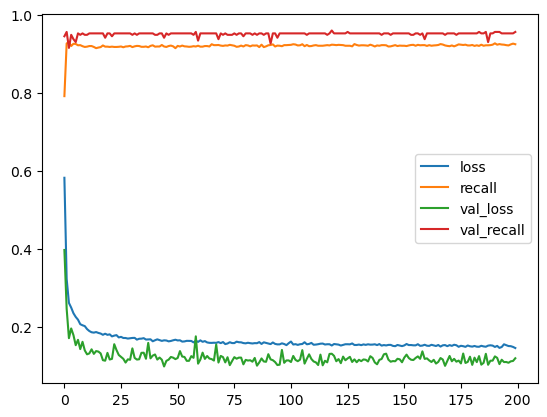

In [179]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [180]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 1s 5ms/step
[[2213   73]
 [  56  658]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2286
           1       0.90      0.92      0.91       714

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



## df_ann5 datasetiyle ann analiz

In [181]:
X = df_ann5.drop(columns='left', axis=1)
y = df_ann5['left']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20)

In [183]:
model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(20, activation = "relu"))
# model.add(Dropout(0.1))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.0025)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [184]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6562568365784293, 1: 2.099929996499825}

#### Layer Architecture Building and Compiling

#### Evaluating Model Performance and Tunning

#### Prediction

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

### Save and Export Variables


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___